In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
from sklearn.impute import SimpleImputer 
from sklearn.metrics import plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier as XGBR
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import roc_auc_score

/home/hp/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
train = pd.read_csv('aps_failure_training_set.csv', na_values='na')
test =  pd.read_csv('aps_failure_test_set.csv', na_values='na')

In [3]:
train

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0   
1       neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0   
2       neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0   
3       neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4       neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
59995   neg  153002     NaN  6.640000e+02   186.0     0.0     0.0     0.0   
59996   neg    2286     NaN  2.130707e+09   224.0     0.0     0.0     0.0   
59997   neg     112     0.0  2.130706e+09    18.0     0.0     0.0     0.0   
59998   neg   80292     NaN  2.130706e+09   494.0     0.0     0.0     0.0   
59999   neg   40222     NaN  6.980000e+02   628.0     0.0     0.0     0.0   

       ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0         0.0     0.0  ...  1240520.0  493384.0   721044.0   469792.0   
1         0.0     0.0  ...   421400.0  178064.0   293306.0   245416.0   
2         0.0     0.0  ...   277378.0  159812.0   423992.0   409564.0   
3         0.0     0.0  ...      240.0      46.0       58.0       44.0   
4         0.0     0.0  ...   622012.0  229790.0   405298.0   347188.0   
...       ...     ...  ...        ...       ...        ...        ...   
59995     0.0     0.0  ...   998500.0  566884.0  1290398.0  1218244.0   
59996     0.0     0.0  ...    10578.0    6760.0    21126.0    68424.0   
59997     0.0     0.0  ...      792.0     386.0      452.0      144.0   
59998     0.0     0.0  ...   699352.0  222654.0   347378.0   225724.0   
59999     0.0     0.0  ...   440066.0  183200.0   344546.0   254068.0   

          ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           10.0       0.0       0.0       0.0     4.0    32.0  
4       286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...       ...       ...       ...     ...     ...  
59995  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996      136.0       0.0       0.0       0.0     0.0     0.0  
59997      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 171 columns]

In [4]:
test

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg      60     0.0  2.000000e+01    12.0     0.0     0.0     0.0   
1       neg      82     0.0  6.800000e+01    40.0     0.0     0.0     0.0   
2       neg   66002     2.0  2.120000e+02   112.0     0.0     0.0     0.0   
3       neg   59816     NaN  1.010000e+03   936.0     0.0     0.0     0.0   
4       neg    1814     NaN  1.560000e+02   140.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
15995   neg   81852     NaN  2.130706e+09   892.0     0.0     0.0     0.0   
15996   neg      18     0.0  5.200000e+01    46.0     8.0    26.0     0.0   
15997   neg   79636     NaN  1.670000e+03  1518.0     0.0     0.0     0.0   
15998   neg     110     NaN  3.600000e+01    32.0     0.0     0.0     0.0   
15999   neg       8     0.0  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006  \
0         0.0     0.0  ...    1098.0     138.0     412.0     654.0       78.0   
1         0.0     0.0  ...    1068.0     276.0    1620.0     116.0       86.0   
2         0.0     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0   
3         0.0     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0   
4         0.0     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0   
...       ...     ...  ...       ...       ...       ...       ...        ...   
15995     0.0     0.0  ...  632658.0  273242.0  510354.0  373918.0   349840.0   
15996     0.0     0.0  ...     266.0      44.0      46.0      14.0        2.0   
15997     0.0     0.0  ...  806832.0  449962.0  778826.0  581558.0   375498.0   
15998     0.0     0.0  ...     588.0     210.0     180.0     544.0     1004.0   
15999     0.0     0.0  ...      46.0      10.0      48.0      14.0       42.0   

         ee_007    ee_008   ee_009  ef_000  eg_000  
0          88.0       0.0      0.0     0.0     0.0  
1         462.0       0.0      0.0     0.0     0.0  
2      153680.0     516.0      0.0     0.0     0.0  
3      210074.0  281662.0   3232.0     0.0     0.0  
4         482.0      76.0      0.0     0.0     0.0  
...         ...       ...      ...     ...     ...  
15995  317840.0  960024.0  25566.0     0.0     0.0  
15996       0.0       0.0      0.0     0.0     0.0  
15997  222866.0  358934.0  19548.0     0.0     0.0  
15998    1338.0      74.0      0.0     0.0     0.0  
15999      46.0       0.0      0.0     0.0     0.0  

[16000 rows x 171 columns]

In [5]:
train_labels = train['class']
test_labels = test['class']
train_features = train.drop('class', axis=1)
test_features = test.drop('class', axis=1)
columns = train.columns

### Total Missing Count and its Percentage

Lets see the percentage of mising data in the training set

In [6]:
#Reference: https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis
total = train.isnull().sum().sort_values(ascending=False)
percent = ((train.isnull().sum()/train.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count in the column', '% of Total Observations in the column'])
missing_data.index.name ='Feature'
missing_data.head(20)

Total Missing Count in the column  \
Feature                                      
br_000                               49264   
bq_000                               48722   
bp_000                               47740   
bo_000                               46333   
ab_000                               46329   
cr_000                               46329   
bn_000                               44009   
bm_000                               39549   
bl_000                               27277   
bk_000                               23034   
ch_000                               14861   
co_000                               14861   
cg_000                               14861   
cf_000                               14861   
ad_000                               14861   
ct_000                               13808   
cu_000                               13808   
cv_000                               13808   
cx_000                               13808   
cy_000                               13808   

         % of Total Observations in the column  
Feature                                         
br_000                               82.106667  
bq_000                               81.203333  
bp_000                               79.566667  
bo_000                               77.221667  
ab_000                               77.215000  
cr_000                               77.215000  
bn_000                               73.348333  
bm_000                               65.915000  
bl_000                               45.461667  
bk_000                               38.390000  
ch_000                               24.768333  
co_000                               24.768333  
cg_000                               24.768333  
cf_000                               24.768333  
ad_000                               24.768333  
ct_000                               23.013333  
cu_000                               23.013333  
cv_000                               23.013333  
cx_000                               23.013333  
cy_000                               23.013333

Lets see the percentage of mising data in the testing set

In [7]:
#Reference: https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis
total = test.isnull().sum().sort_values(ascending=False)
percent = ((test.isnull().sum()/train.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count in the column', '% of Total Observations in the column'])
missing_data.index.name ='Feature'
missing_data.head(10)

Total Missing Count in the column  \
Feature                                      
br_000                               13129   
bq_000                               12981   
bp_000                               12721   
bo_000                               12376   
ab_000                               12363   
cr_000                               12363   
bn_000                               11713   
bm_000                               10546   
bl_000                                7226   
bk_000                                6094   

         % of Total Observations in the column  
Feature                                         
br_000                               21.881667  
bq_000                               21.635000  
bp_000                               21.201667  
bo_000                               20.626667  
ab_000                               20.605000  
cr_000                               20.605000  
bn_000                               19.521667  
bm_000                               17.576667  
bl_000                               12.043333  
bk_000                               10.156667

Let us combine the datasets and view the percentages as a whole 

In [8]:
complete_dataset = pd.concat([train, test])
complete_dataset

class  aa_000  ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
0       neg   76698     NaN  2.130706e+09   280.0     0.0     0.0     0.0   
1       neg   33058     NaN  0.000000e+00     NaN     0.0     0.0     0.0   
2       neg   41040     NaN  2.280000e+02   100.0     0.0     0.0     0.0   
3       neg      12     0.0  7.000000e+01    66.0     0.0    10.0     0.0   
4       neg   60874     NaN  1.368000e+03   458.0     0.0     0.0     0.0   
...     ...     ...     ...           ...     ...     ...     ...     ...   
15995   neg   81852     NaN  2.130706e+09   892.0     0.0     0.0     0.0   
15996   neg      18     0.0  5.200000e+01    46.0     8.0    26.0     0.0   
15997   neg   79636     NaN  1.670000e+03  1518.0     0.0     0.0     0.0   
15998   neg     110     NaN  3.600000e+01    32.0     0.0     0.0     0.0   
15999   neg       8     0.0  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005    ee_006  \
0         0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0  339156.0   
1         0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0  133654.0   
2         0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0  320746.0   
3         0.0     0.0  ...      240.0      46.0      58.0      44.0      10.0   
4         0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0  286954.0   
...       ...     ...  ...        ...       ...       ...       ...       ...   
15995     0.0     0.0  ...   632658.0  273242.0  510354.0  373918.0  349840.0   
15996     0.0     0.0  ...      266.0      44.0      46.0      14.0       2.0   
15997     0.0     0.0  ...   806832.0  449962.0  778826.0  581558.0  375498.0   
15998     0.0     0.0  ...      588.0     210.0     180.0     544.0    1004.0   
15999     0.0     0.0  ...       46.0      10.0      48.0      14.0      42.0   

         ee_007    ee_008   ee_009  ef_000  eg_000  
0      157956.0   73224.0      0.0     0.0     0.0  
1       81140.0   97576.0   1500.0     0.0     0.0  
2      158022.0   95128.0    514.0     0.0     0.0  
3           0.0       0.0      0.0     4.0    32.0  
4      311560.0  433954.0   1218.0     0.0     0.0  
...         ...       ...      ...     ...     ...  
15995  317840.0  960024.0  25566.0     0.0     0.0  
15996       0.0       0.0      0.0     0.0     0.0  
15997  222866.0  358934.0  19548.0     0.0     0.0  
15998    1338.0      74.0      0.0     0.0     0.0  
15999      46.0       0.0      0.0     0.0     0.0  

[76000 rows x 171 columns]

In [9]:
#Reference: https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis
total = complete_dataset.isnull().sum().sort_values(ascending=False)
percent = ((complete_dataset.isnull().sum()/complete_dataset.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1,join='outer', keys=['Total Missing Count in the column', '% of Total Observations in the column'])
missing_data.index.name ='Feature'
missing_data.head(10)

Total Missing Count in the column  \
Feature                                      
br_000                               62393   
bq_000                               61703   
bp_000                               60461   
bo_000                               58709   
cr_000                               58692   
ab_000                               58692   
bn_000                               55722   
bm_000                               50095   
bl_000                               34503   
bk_000                               29128   

         % of Total Observations in the column  
Feature                                         
br_000                               82.096053  
bq_000                               81.188158  
bp_000                               79.553947  
bo_000                               77.248684  
cr_000                               77.226316  
ab_000                               77.226316  
bn_000                               73.318421  
bm_000                               65.914474  
bl_000                               45.398684  
bk_000                               38.326316

### b (i) Research what types of techniques are usually used for dealing with data with missing values.



a) We can try using the mean/mode/median of the existing datas to fill these missing datas.

Code:

```
data.fillna(data.mean())
data.fillna(data.mode())
```

b) Now let’s use the DataFrame shown above and we can fill in the missing values using interpolation along each column. Interpolation initiates a function that suits your data. This function can then be used to extrapolate values for missing data.There are different interpolation strategies available in Pandas such as linear or polynomial. Remember, if you use the polynomial strategy, you would need to specify the order of the polynomial for interpolation.

Code:

```
data.interpolate(method='polynomial', order=2, axis=0)
```

c)  Using other methods like KNN

The three methods shown above work out within the Pandas framework. But if you have access to other libraries like scikit-learn one can also you the KNNImputer.KNNImputer works on the principle as to how each new point resembles all the other points in the data. So, by checking the k-nearest neighbors in the dataset for a missing value, we can impute them based on the neighborhood or the closest ‘k points’.

d) If the variable has more than 50 or 75 percent of missing values you can drop them.


#### Let us impute the data first and then split it 

Replacing the negative with 0 and positive with one for easier interpretation later.

In [10]:
complete_dataset = complete_dataset.replace('neg',0)
complete_dataset = complete_dataset.replace('pos',1)

In [11]:
# Imputing the dataset using the mean of the values
imputer = SimpleImputer(missing_values = np.nan,strategy ='mean')
complete_dataset = pd.DataFrame(imputer.fit(complete_dataset).transform(complete_dataset))
complete_dataset.columns = columns
complete_dataset

class   aa_000   ab_000        ac_000         ad_000  ae_000  af_000  \
0        0.0  76698.0  0.72556  2.130706e+09     280.000000     0.0     0.0   
1        0.0  33058.0  0.72556  0.000000e+00  150629.962105     0.0     0.0   
2        0.0  41040.0  0.72556  2.280000e+02     100.000000     0.0     0.0   
3        0.0     12.0  0.00000  7.000000e+01      66.000000     0.0    10.0   
4        0.0  60874.0  0.72556  1.368000e+03     458.000000     0.0     0.0   
...      ...      ...      ...           ...            ...     ...     ...   
75995    0.0  81852.0  0.72556  2.130706e+09     892.000000     0.0     0.0   
75996    0.0     18.0  0.00000  5.200000e+01      46.000000     8.0    26.0   
75997    0.0  79636.0  0.72556  1.670000e+03    1518.000000     0.0     0.0   
75998    0.0    110.0  0.72556  3.600000e+01      32.000000     0.0     0.0   
75999    0.0      8.0  0.00000  6.000000e+00       4.000000     2.0     2.0   

       ag_000  ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005  \
0         0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1         0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2         0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3         0.0     0.0     0.0  ...      240.0      46.0      58.0      44.0   
4         0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   
...       ...     ...     ...  ...        ...       ...       ...       ...   
75995     0.0     0.0     0.0  ...   632658.0  273242.0  510354.0  373918.0   
75996     0.0     0.0     0.0  ...      266.0      44.0      46.0      14.0   
75997     0.0     0.0     0.0  ...   806832.0  449962.0  778826.0  581558.0   
75998     0.0     0.0     0.0  ...      588.0     210.0     180.0     544.0   
75999     0.0     0.0     0.0  ...       46.0      10.0      48.0      14.0   

         ee_006    ee_007    ee_008   ee_009  ef_000  eg_000  
0      339156.0  157956.0   73224.0      0.0     0.0     0.0  
1      133654.0   81140.0   97576.0   1500.0     0.0     0.0  
2      320746.0  158022.0   95128.0    514.0     0.0     0.0  
3          10.0       0.0       0.0      0.0     4.0    32.0  
4      286954.0  311560.0  433954.0   1218.0     0.0     0.0  
...         ...       ...       ...      ...     ...     ...  
75995  349840.0  317840.0  960024.0  25566.0     0.0     0.0  
75996       2.0       0.0       0.0      0.0     0.0     0.0  
75997  375498.0  222866.0  358934.0  19548.0     0.0     0.0  
75998    1004.0    1338.0      74.0      0.0     0.0     0.0  
75999      42.0      46.0       0.0      0.0     0.0     0.0  

[76000 rows x 171 columns]

Let us now view the complete dataset after imputing it. 

In [12]:
complete_dataset

class   aa_000   ab_000        ac_000         ad_000  ae_000  af_000  \
0        0.0  76698.0  0.72556  2.130706e+09     280.000000     0.0     0.0   
1        0.0  33058.0  0.72556  0.000000e+00  150629.962105     0.0     0.0   
2        0.0  41040.0  0.72556  2.280000e+02     100.000000     0.0     0.0   
3        0.0     12.0  0.00000  7.000000e+01      66.000000     0.0    10.0   
4        0.0  60874.0  0.72556  1.368000e+03     458.000000     0.0     0.0   
...      ...      ...      ...           ...            ...     ...     ...   
75995    0.0  81852.0  0.72556  2.130706e+09     892.000000     0.0     0.0   
75996    0.0     18.0  0.00000  5.200000e+01      46.000000     8.0    26.0   
75997    0.0  79636.0  0.72556  1.670000e+03    1518.000000     0.0     0.0   
75998    0.0    110.0  0.72556  3.600000e+01      32.000000     0.0     0.0   
75999    0.0      8.0  0.00000  6.000000e+00       4.000000     2.0     2.0   

       ag_000  ag_001  ag_002  ...     ee_002    ee_003    ee_004    ee_005  \
0         0.0     0.0     0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1         0.0     0.0     0.0  ...   421400.0  178064.0  293306.0  245416.0   
2         0.0     0.0     0.0  ...   277378.0  159812.0  423992.0  409564.0   
3         0.0     0.0     0.0  ...      240.0      46.0      58.0      44.0   
4         0.0     0.0     0.0  ...   622012.0  229790.0  405298.0  347188.0   
...       ...     ...     ...  ...        ...       ...       ...       ...   
75995     0.0     0.0     0.0  ...   632658.0  273242.0  510354.0  373918.0   
75996     0.0     0.0     0.0  ...      266.0      44.0      46.0      14.0   
75997     0.0     0.0     0.0  ...   806832.0  449962.0  778826.0  581558.0   
75998     0.0     0.0     0.0  ...      588.0     210.0     180.0     544.0   
75999     0.0     0.0     0.0  ...       46.0      10.0      48.0      14.0   

         ee_006    ee_007    ee_008   ee_009  ef_000  eg_000  
0      339156.0  157956.0   73224.0      0.0     0.0     0.0  
1      133654.0   81140.0   97576.0   1500.0     0.0     0.0  
2      320746.0  158022.0   95128.0    514.0     0.0     0.0  
3          10.0       0.0       0.0      0.0     4.0    32.0  
4      286954.0  311560.0  433954.0   1218.0     0.0     0.0  
...         ...       ...       ...      ...     ...     ...  
75995  349840.0  317840.0  960024.0  25566.0     0.0     0.0  
75996       2.0       0.0       0.0      0.0     0.0     0.0  
75997  375498.0  222866.0  358934.0  19548.0     0.0     0.0  
75998    1004.0    1338.0      74.0      0.0     0.0     0.0  
75999      42.0      46.0       0.0      0.0     0.0     0.0  

[76000 rows x 171 columns]

In [13]:
complete_dataset['class'] =complete_dataset['class'].fillna(0).astype(int)
complete_dataset['class'] = complete_dataset['class'].fillna(1).astype(int)

Now let us split it back into train and test dataset for futher analysis

In [14]:
training_data= complete_dataset.loc[0:59999,:]
testing_data= complete_dataset.loc[60000:,:]

In [15]:
training_data

class    aa_000   ab_000        ac_000         ad_000  ae_000  af_000  \
0          0   76698.0  0.72556  2.130706e+09     280.000000     0.0     0.0   
1          0   33058.0  0.72556  0.000000e+00  150629.962105     0.0     0.0   
2          0   41040.0  0.72556  2.280000e+02     100.000000     0.0     0.0   
3          0      12.0  0.00000  7.000000e+01      66.000000     0.0    10.0   
4          0   60874.0  0.72556  1.368000e+03     458.000000     0.0     0.0   
...      ...       ...      ...           ...            ...     ...     ...   
59995      0  153002.0  0.72556  6.640000e+02     186.000000     0.0     0.0   
59996      0    2286.0  0.72556  2.130707e+09     224.000000     0.0     0.0   
59997      0     112.0  0.00000  2.130706e+09      18.000000     0.0     0.0   
59998      0   80292.0  0.72556  2.130706e+09     494.000000     0.0     0.0   
59999      0   40222.0  0.72556  6.980000e+02     628.000000     0.0     0.0   

       ag_000  ag_001  ag_002  ...     ee_002    ee_003     ee_004     ee_005  \
0         0.0     0.0     0.0  ...  1240520.0  493384.0   721044.0   469792.0   
1         0.0     0.0     0.0  ...   421400.0  178064.0   293306.0   245416.0   
2         0.0     0.0     0.0  ...   277378.0  159812.0   423992.0   409564.0   
3         0.0     0.0     0.0  ...      240.0      46.0       58.0       44.0   
4         0.0     0.0     0.0  ...   622012.0  229790.0   405298.0   347188.0   
...       ...     ...     ...  ...        ...       ...        ...        ...   
59995     0.0     0.0     0.0  ...   998500.0  566884.0  1290398.0  1218244.0   
59996     0.0     0.0     0.0  ...    10578.0    6760.0    21126.0    68424.0   
59997     0.0     0.0     0.0  ...      792.0     386.0      452.0      144.0   
59998     0.0     0.0     0.0  ...   699352.0  222654.0   347378.0   225724.0   
59999     0.0     0.0     0.0  ...   440066.0  183200.0   344546.0   254068.0   

          ee_006    ee_007    ee_008    ee_009  ef_000  eg_000  
0       339156.0  157956.0   73224.0       0.0     0.0     0.0  
1       133654.0   81140.0   97576.0    1500.0     0.0     0.0  
2       320746.0  158022.0   95128.0     514.0     0.0     0.0  
3           10.0       0.0       0.0       0.0     4.0    32.0  
4       286954.0  311560.0  433954.0    1218.0     0.0     0.0  
...          ...       ...       ...       ...     ...     ...  
59995  1019768.0  717762.0  898642.0   28588.0     0.0     0.0  
59996      136.0       0.0       0.0       0.0     0.0     0.0  
59997      146.0    2622.0       0.0       0.0     0.0     0.0  
59998   194440.0  165070.0  802280.0  388422.0     0.0     0.0  
59999   225148.0  158304.0  170384.0     158.0     0.0     0.0  

[60000 rows x 171 columns]

In [16]:
testing_data

class   aa_000   ab_000        ac_000  ad_000  ae_000  af_000  ag_000  \
60000      0     60.0  0.00000  2.000000e+01    12.0     0.0     0.0     0.0   
60001      0     82.0  0.00000  6.800000e+01    40.0     0.0     0.0     0.0   
60002      0  66002.0  2.00000  2.120000e+02   112.0     0.0     0.0     0.0   
60003      0  59816.0  0.72556  1.010000e+03   936.0     0.0     0.0     0.0   
60004      0   1814.0  0.72556  1.560000e+02   140.0     0.0     0.0     0.0   
...      ...      ...      ...           ...     ...     ...     ...     ...   
75995      0  81852.0  0.72556  2.130706e+09   892.0     0.0     0.0     0.0   
75996      0     18.0  0.00000  5.200000e+01    46.0     8.0    26.0     0.0   
75997      0  79636.0  0.72556  1.670000e+03  1518.0     0.0     0.0     0.0   
75998      0    110.0  0.72556  3.600000e+01    32.0     0.0     0.0     0.0   
75999      0      8.0  0.00000  6.000000e+00     4.0     2.0     2.0     0.0   

       ag_001  ag_002  ...    ee_002    ee_003    ee_004    ee_005     ee_006  \
60000     0.0     0.0  ...    1098.0     138.0     412.0     654.0       78.0   
60001     0.0     0.0  ...    1068.0     276.0    1620.0     116.0       86.0   
60002     0.0     0.0  ...  495076.0  380368.0  440134.0  269556.0  1315022.0   
60003     0.0     0.0  ...  540820.0  243270.0  483302.0  485332.0   431376.0   
60004     0.0     0.0  ...    7646.0    4144.0   18466.0   49782.0     3176.0   
...       ...     ...  ...       ...       ...       ...       ...        ...   
75995     0.0     0.0  ...  632658.0  273242.0  510354.0  373918.0   349840.0   
75996     0.0     0.0  ...     266.0      44.0      46.0      14.0        2.0   
75997     0.0     0.0  ...  806832.0  449962.0  778826.0  581558.0   375498.0   
75998     0.0     0.0  ...     588.0     210.0     180.0     544.0     1004.0   
75999     0.0     0.0  ...      46.0      10.0      48.0      14.0       42.0   

         ee_007    ee_008   ee_009  ef_000  eg_000  
60000      88.0       0.0      0.0     0.0     0.0  
60001     462.0       0.0      0.0     0.0     0.0  
60002  153680.0     516.0      0.0     0.0     0.0  
60003  210074.0  281662.0   3232.0     0.0     0.0  
60004     482.0      76.0      0.0     0.0     0.0  
...         ...       ...      ...     ...     ...  
75995  317840.0  960024.0  25566.0     0.0     0.0  
75996       0.0       0.0      0.0     0.0     0.0  
75997  222866.0  358934.0  19548.0     0.0     0.0  
75998    1338.0      74.0      0.0     0.0     0.0  
75999      46.0       0.0      0.0     0.0     0.0  

[16000 rows x 171 columns]

### b(ii) For each of the 170 features, calculate the coefficient of variation CV=s/m,where s is sample standard deviation and m is sample mean.

In [17]:
import scipy.stats as scistat

j=0
for features in complete_dataset.columns.tolist():
    print(features + ":",scistat.variation(complete_dataset)[j])
    j=j+1

class: 7.367002597578427
aa_000: 4.3285793576589375
ab_000: 2.178258263158115
ac_000: 2.167639047613639
ad_000: 206.7201395673932
ae_000: 22.293523760148187
af_000: 18.208895706341707
ag_000: 91.46005187901179
ag_001: 42.084065657988226
ag_002: 17.625792607127686
ag_003: 8.753241932668237
ag_004: 5.4750802348148815
ag_005: 2.964210429463508
ag_006: 2.3525724045656164
ag_007: 2.8124794718194845
ag_008: 6.274938796991129
ag_009: 32.16684571446008
ah_000: 2.3155248608753802
ai_000: 18.50618637634873
aj_000: 43.144195717418405
ak_000: 78.62247047763324
al_000: 9.111931274139064
am_0: 9.067135801135006
an_000: 2.254211821771076
ao_000: 2.2760995022801724
ap_000: 3.085864585455566
aq_000: 2.853452544518207
ar_000: 10.569132787355027
as_000: 113.88200615202616
at_000: 23.186907381280523
au_000: 86.0850711567076
av_000: 5.730447656843744
ax_000: 3.859009604951544
ay_000: 40.902249659389675
ay_001: 49.24831058004875
ay_002: 38.34206692173698
ay_003: 28.329849238336504
ay_004: 33.0399145872595
a

### b(iii)  Plot a correlation matrix for the features in the data set.

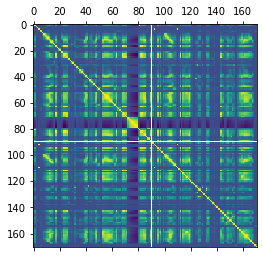

In [18]:
plt.matshow(complete_dataset.corr())

### ### b(iv) Pick √170 features with highest CV, and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

The square root of 170 is 13 so we are picking 13 feature with the highest CV

In [19]:
cv=scistat.variation(complete_dataset).argsort()[::-1][:13]  

In [20]:
cols_with_highest_cv = training_data.columns[cv].tolist()

In [21]:
cols_with_highest_cv

['cf_000',
 'co_000',
 'ad_000',
 'cs_009',
 'dj_000',
 'as_000',
 'dh_000',
 'df_000',
 'ag_000',
 'au_000',
 'ak_000',
 'az_009',
 'ay_009']

In [22]:
complete_dataset[cols_with_highest_cv]

cf_000         co_000         ad_000  cs_009  dj_000  as_000  \
0           2.000000     220.000000     280.000000     0.0     0.0     0.0   
1      150231.156793  150517.375485  150629.962105     0.0     0.0     0.0   
2           0.000000       0.000000     100.000000     0.0     0.0     0.0   
3           2.000000       2.000000      66.000000     0.0     0.0     0.0   
4           0.000000     202.000000     458.000000     0.0     0.0     0.0   
...              ...            ...            ...     ...     ...     ...   
75995       2.000000      42.000000     892.000000     0.0     0.0     0.0   
75996       2.000000       0.000000      46.000000     0.0     0.0     0.0   
75997       2.000000     378.000000    1518.000000     0.0     0.0     0.0   
75998       0.000000       0.000000      32.000000     0.0     0.0     0.0   
75999       0.000000       0.000000       4.000000     0.0     0.0     0.0   

       dh_000  df_000  ag_000  au_000  ak_000  az_009  ay_009  
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0  
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0  
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0  
...       ...     ...     ...     ...     ...     ...     ...  
75995     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
75996     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
75997     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
75998     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
75999     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[76000 rows x 13 columns]

In [23]:
plot_data = complete_dataset[cols_with_highest_cv]
plot_data['class'] = complete_dataset['class']

/tmp/ipykernel_13545/2129336932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data['class'] = complete_dataset['class']


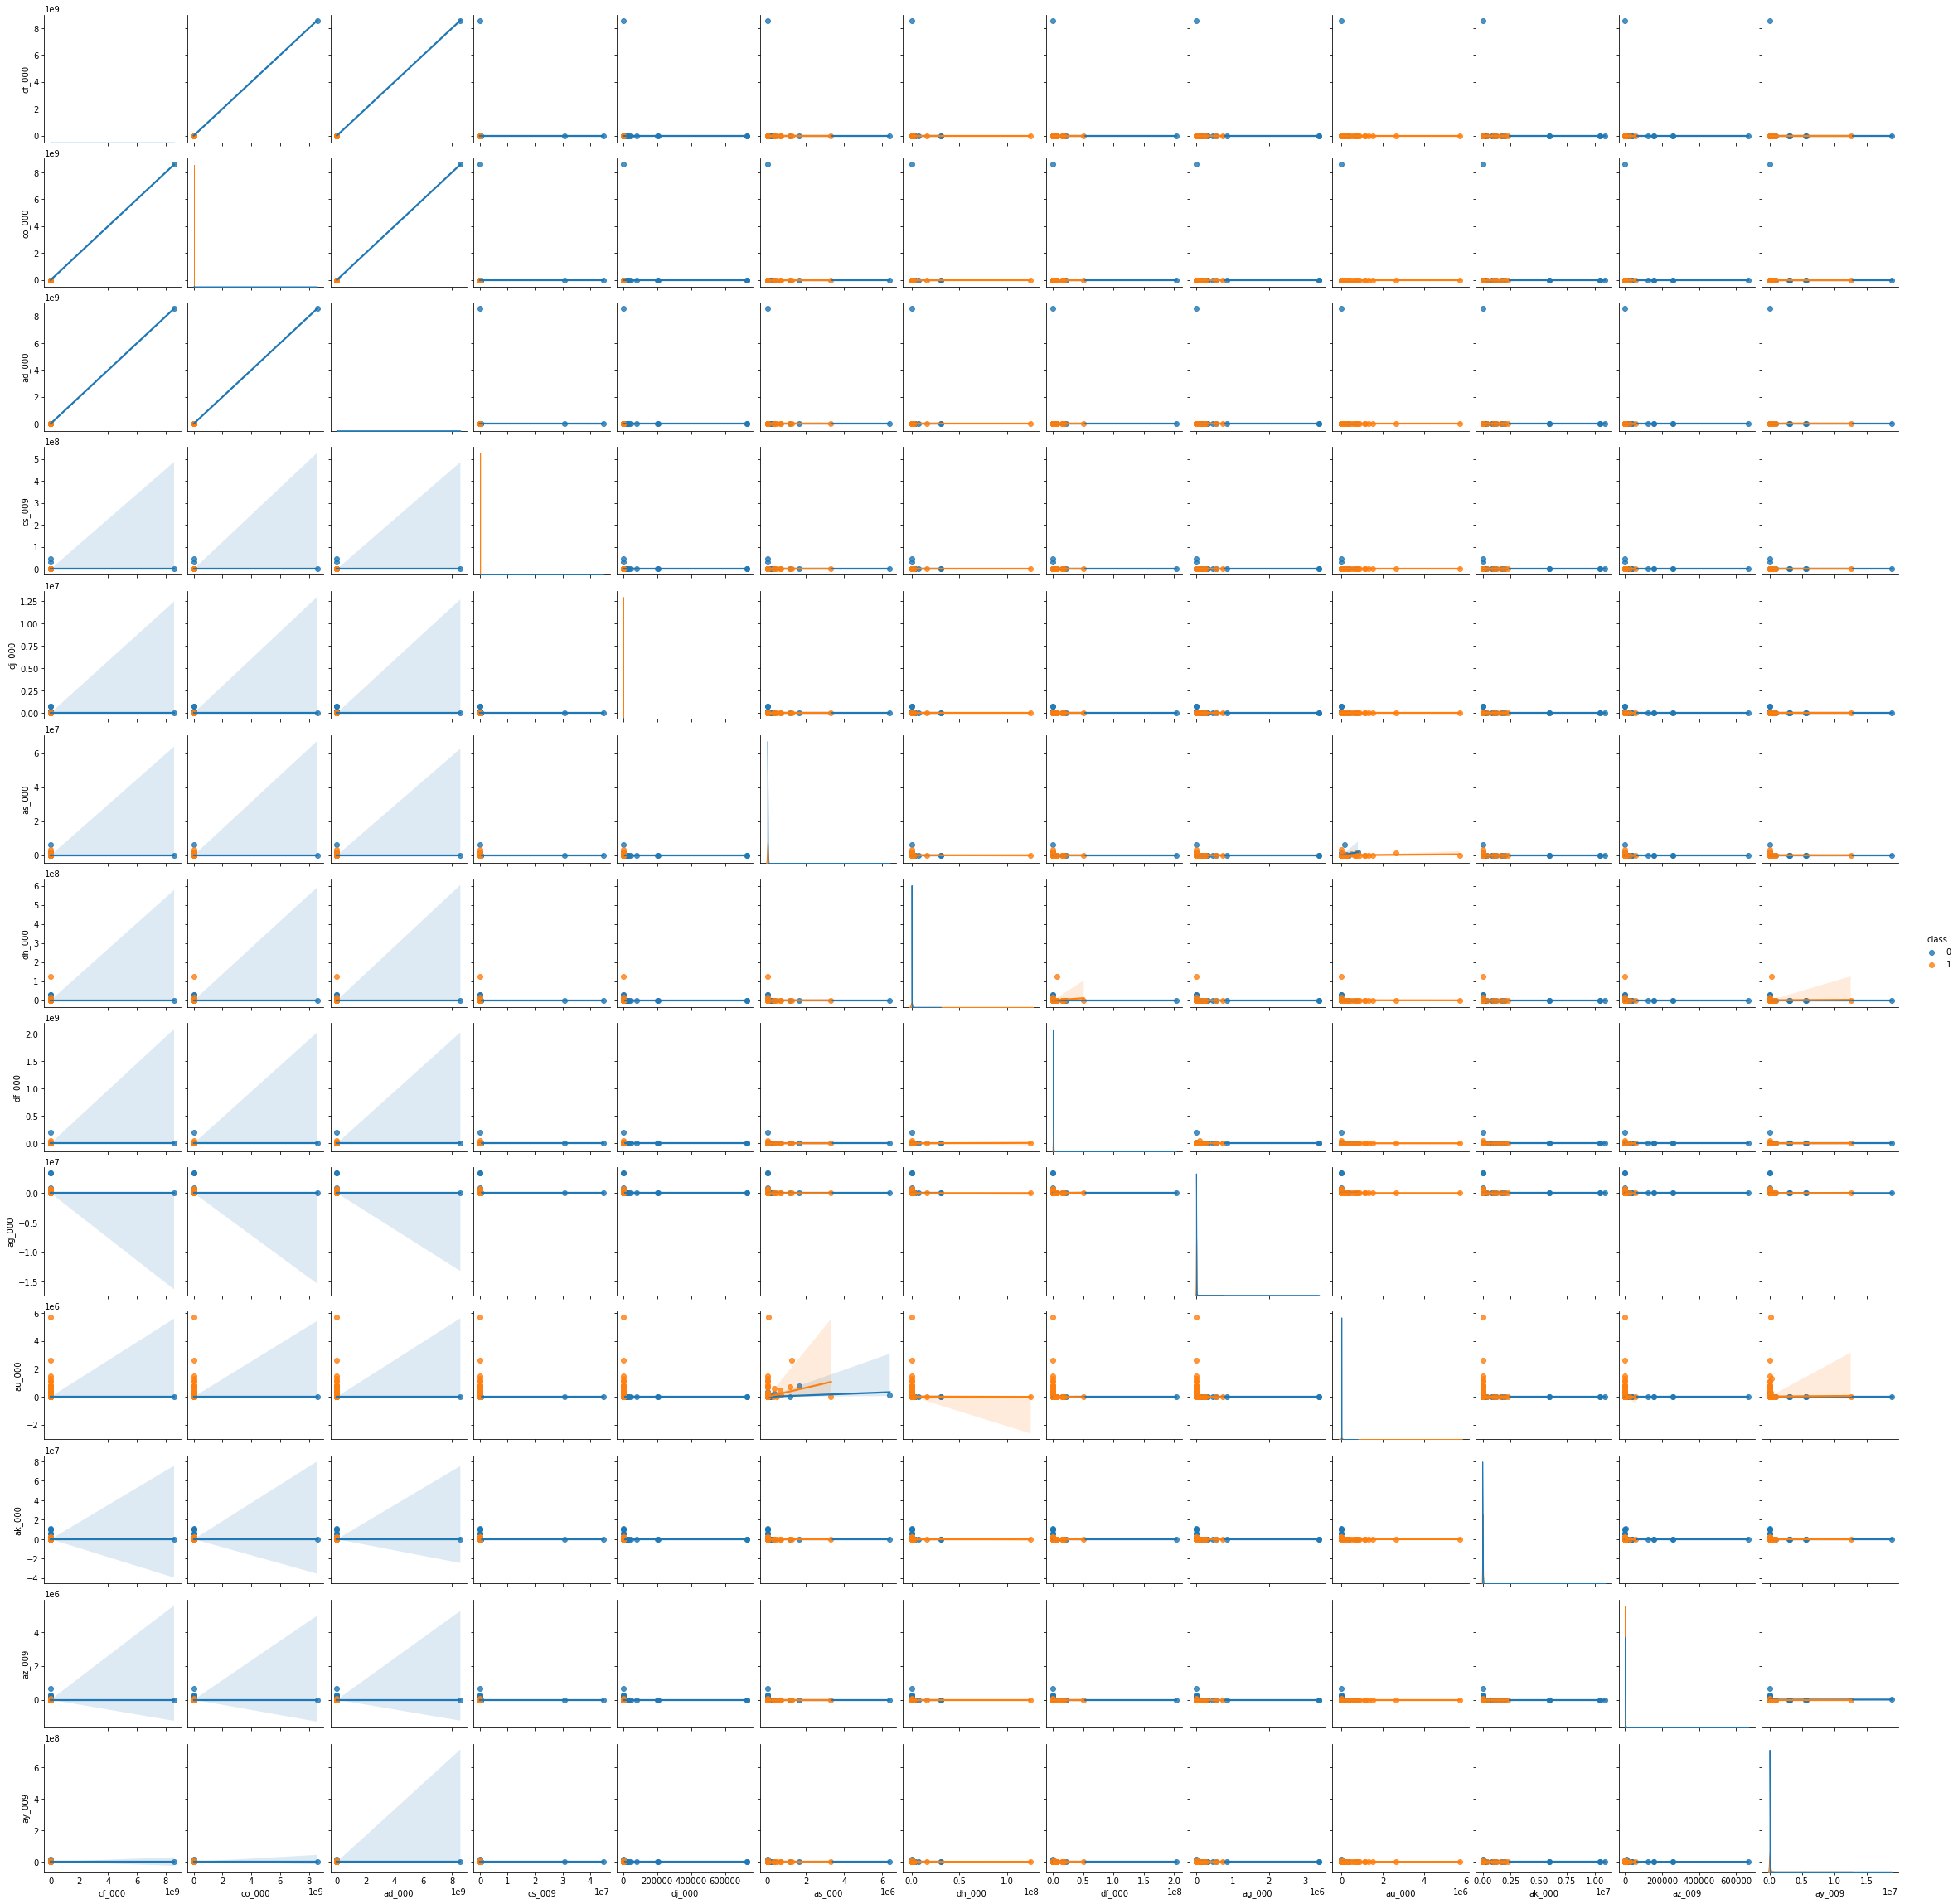

In [24]:
 sns.pairplot(plot_data, hue='class', kind="reg")

Conclusion:Pair plot shows that ee_003 and ee_004 are highly correlated and have positive correlation. Relation among other features can also be observed.


Let us now draw the box plots for the same features

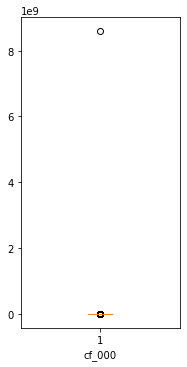

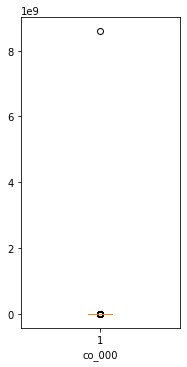

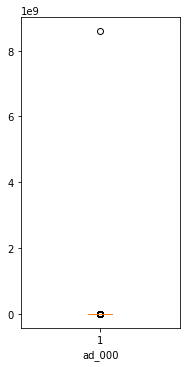

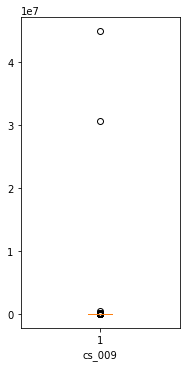

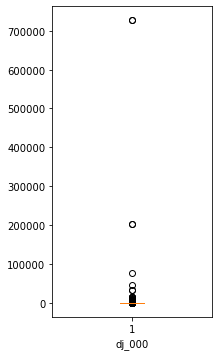

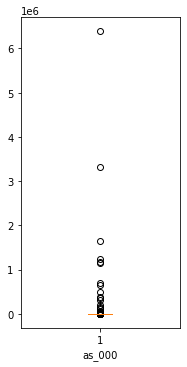

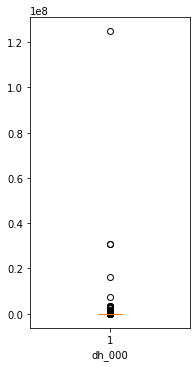

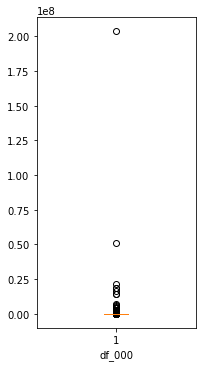

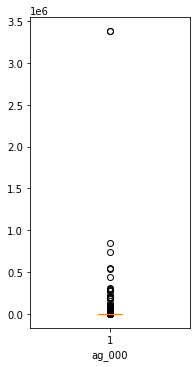

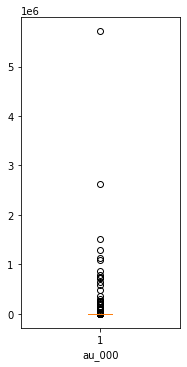

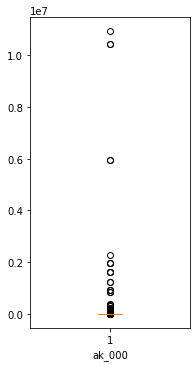

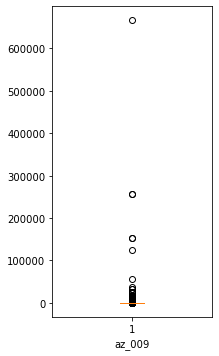

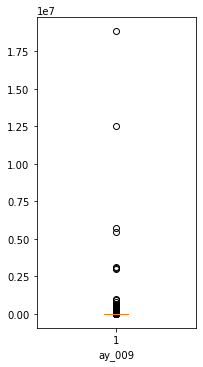

In [25]:
i=1
for eachcol in cols_with_highest_cv:
    plt.subplots(figsize=(20, 40))
    plt.subplot(6,6,i)
    plt.xlabel(eachcol)
    plt.boxplot(complete_dataset[eachcol])
    i=i+1

### b (v) Determine the number of positive and negative data. Is this data set imbalanced?

In [26]:
complete_dataset['class'].value_counts()

0    74625
1     1375
Name: class, dtype: int64

The number of negative values are way more higher than the number of positive values which indicates an imbalance

### 1. (c) Train a random forest to classify the data set. 
Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and
misclassification for training and test sets and report them (You may use pROC
package). Calculate Out of Bag error estimate for your random forset and compare
it to the test error.

In [27]:
X_train=training_data[training_data.columns[training_data.columns!='class']]
y_train=training_data['class']
X_test=testing_data[testing_data.columns[testing_data.columns!='class']]
y_test=testing_data['class']

Training a Random Forest Classifier

In [28]:
clf = RandomForestClassifier(max_depth=3, random_state=42, warm_start=False, oob_score=True)
clf.set_params(warm_start=True, oob_score=True)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, oob_score=True, random_state=42,
                       warm_start=True)

#### Calculate the confusion matrix, ROC, AUC, and misclassification for testing data

In [29]:
y_pred = clf.predict(X_test)

In [30]:
y_pred = y_pred.astype(int)

In [31]:
# View confusion matrix for test data and predictions
cm = confusion_matrix(y_test, y_pred)
cm

array([[15616,     9],
       [  247,   128]])

In [32]:
tn, fp, fn, tp = cm.ravel()
print("Total missclassification values: ", fp + fn)

Total missclassification values:  256


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     15625
           1       0.93      0.34      0.50       375

    accuracy                           0.98     16000
   macro avg       0.96      0.67      0.75     16000
weighted avg       0.98      0.98      0.98     16000



/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


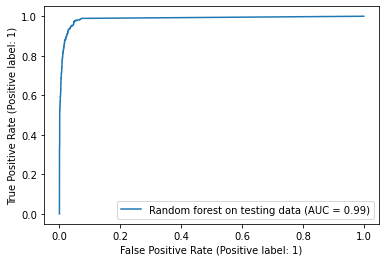

In [34]:
plot_roc_curve(clf, X_test, y_test, name = 'Random forest on testing data')

In [35]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
auc = roc_auc_score(y_test, y_pred_proba)
print("Auc score for testing data is", auc)

Auc score for testing data is 0.9874448213333332


In [36]:
print('Misclassification score', accuracy_score(y_test, y_pred))

Misclassification score 0.984


In [37]:
print('Testing score: ', clf.score(X_test, y_test))

Testing score:  0.984


#### Calculate the confusion matrix, ROC, AUC, and misclassification for training data

In [38]:
y_pred = clf.predict(X_train)
y_pred = y_pred.astype(int)

In [39]:
# View confusion matrix for test data and predictions
cm = confusion_matrix(y_train, y_pred)
cm

array([[58964,    36],
       [  655,   345]])

In [40]:
tn, fp, fn, tp = cm.ravel()
print("Total missclassification values: ",  fp + fn)

Total missclassification values:  691


In [41]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     59000
           1       0.91      0.34      0.50      1000

    accuracy                           0.99     60000
   macro avg       0.95      0.67      0.75     60000
weighted avg       0.99      0.99      0.99     60000



/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


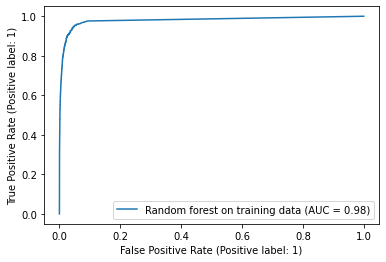

In [42]:
plot_roc_curve(clf, X_train, y_train, name = 'Random forest on training data')

In [43]:
y_pred_proba = clf.predict_proba(X_train)[::,1]
auc = roc_auc_score(y_train, y_pred_proba)
print("Auc score for training data is", auc)

Auc score for training data is 0.9797063389830508


In [44]:
print('Training score: ', clf.score(X_train, y_train))

Training score:  0.9884833333333334


As expected the accuracy of the model when evaluating the training set is very high.

This is the misclassification score

#### Out of bag error

In [45]:
1 - clf.oob_score_

0.011833333333333362

Conclusion: We see that the accuracy measured by oob is very similar to that obtained with the testing set. It thus follows through the theory that the oob accuracy is a better metric by which to evaluate the performance of your model rather than just the score. This is a consequence of bagging models and cannot be done with other types of classifiers.

### 1.d Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

### Method 1: Using class weight as balanced

In [48]:
clf = RandomForestClassifier(max_depth=3, random_state=42, warm_start=False, oob_score=True, class_weight='balanced')
clf.set_params(warm_start=True, oob_score=True)
clf.fit(X_train, y_train)
print('Training score: ', clf.score(X_train, y_train))
print('Testing score: ', clf.score(X_test, y_test))
print("Out of bag error", 1 - clf.oob_score_)

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:765: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


Training score:  0.9448
Testing score:  0.94725
Out of bag error 0.055433333333333334


### Method 2: Bootstrap Class Weighting

In [49]:
clf = RandomForestClassifier(max_depth=3, random_state=42, warm_start=False, oob_score=True, class_weight='balanced_subsample')
clf.set_params(warm_start=True, oob_score=True)
clf.fit(X_train, y_train)
print('Training score: ', clf.score(X_train, y_train))
print('Testing score: ', clf.score(X_test, y_test))
print("Out of bag error", 1 - clf.oob_score_)

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:765: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(


Training score:  0.94485
Testing score:  0.9475
Out of bag error 0.05518333333333336


### Method 3: Using Balanced Random Forest Classifier

In [50]:
from imblearn.ensemble import BalancedRandomForestClassifier

clf  = BalancedRandomForestClassifier(n_estimators=10)
clf.set_params(warm_start=True, oob_score=True)
clf.fit(X_train, y_train)
print('Training score: ', clf.score(X_train, y_train))
print('Testing score: ', clf.score(X_test, y_test))
print("Out of bag error", 1 - clf.oob_score_)

Training score:  0.9514833333333333
Testing score:  0.954
Out of bag error 0.07692307692307687


/home/hp/anaconda3/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:630: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn(


### Method 3: Using Easy Ensemble Classifier

In [52]:
from imblearn.ensemble import EasyEnsembleClassifier
clf = EasyEnsembleClassifier(n_estimators=10)
clf.set_params(warm_start=True)
clf.fit(X_train, y_train)
print('Training score: ', clf.score(X_train, y_train))
print('Testing score: ', clf.score(X_test, y_test))

Training score:  0.9496666666666667
Testing score:  0.95225


As you can see since the balanced random forest classifier gives us the best results we will use it to calculate
the confusion matrix missclassification and roc auc.

In [53]:
clf  = BalancedRandomForestClassifier(n_estimators=10)
clf.set_params(warm_start=True, oob_score=True)
clf.fit(X_train, y_train)

/home/hp/anaconda3/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:630: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn(


BalancedRandomForestClassifier(n_estimators=10, oob_score=True, warm_start=True)

Analysis on testing data

In [54]:
y_pred = clf.predict(X_test)
y_pred = y_pred.astype(int)
cm = confusion_matrix(y_test, y_pred)
cm

array([[14858,   767],
       [    6,   369]])

In [55]:
tn, fp, fn, tp = cm.ravel()
print("Total missclassification values: ", fp + fn)

Total missclassification values:  773


/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


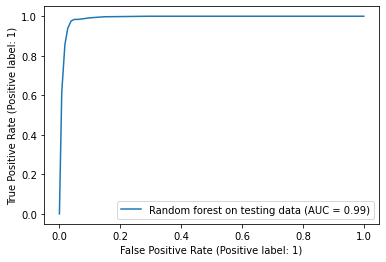

In [56]:
plot_roc_curve(clf, X_test, y_test, name = 'Random forest on testing data')

In [57]:
y_pred_proba = clf.predict_proba(X_test)[::,1]
auc = roc_auc_score(y_test, y_pred_proba)
print("Auc score for testing data is", auc)

Auc score for testing data is 0.9892078933333333


In [58]:
print("Missclassification" , accuracy_score(y_test, y_pred))
print('Testing score: ', clf.score(X_test, y_test))

Missclassification 0.9516875
Testing score:  0.9516875


Analysis on training data

In [59]:
y_pred = clf.predict(X_train)
y_pred = y_pred.astype(int)
cm = confusion_matrix(y_train, y_pred)
cm

array([[56139,  2861],
       [    7,   993]])

In [60]:
tn, fp, fn, tp = cm.ravel()
print("Total missclassification values: ", fp + fn)

Total missclassification values:  2868


/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


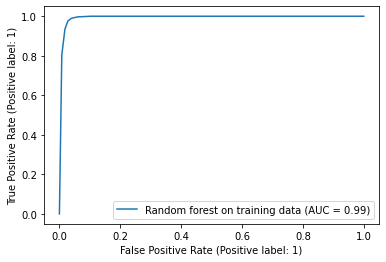

In [61]:
plot_roc_curve(clf, X_train, y_train, name = 'Random forest on training data')

In [62]:
y_pred_proba = clf.predict_proba(X_train)[::,1]
auc = roc_auc_score(y_train, y_pred_proba)
print("Auc score for training data is", auc)

Auc score for training data is 0.9931402118644068


In [63]:
print("Missclassification" , accuracy_score(y_train, y_pred))
print('Training score: ', clf.score(X_train, y_train))

Missclassification 0.9522
Training score:  0.9522


In [64]:
print("Out of bag error", 1 - clf.oob_score_)

Out of bag error 0.07822456602944405


Comparison:
As you can see after the imbalance the number of points correctly classified is more and also the test and training scores are higher than the one due to the imbalanced class. This is because the model is trainined better on the balanced data points

### 1.e  XGBoost to fit the model tree

In [65]:
pipeline = imbpipeline(steps = [['classifier', XGBR(random_state=11,silent=True)]])

kfold = KFold(n_splits=5,shuffle=True,random_state=11)
    
param_grid = {'classifier__reg_alpha':[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1.2,1.4,1.6,1.8, 1, 2, 3]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

/home/hp/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/hp/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/hp/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/home/hp/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropr

[18:29:40] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:29:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cross-validation score: 0.9946166666666667
Test score: 0.994


In [66]:
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.9946166666666667
Test score: 0.994


In [67]:
grid_search.best_params_

{'classifier__reg_alpha': 1.6}

### The lowest Validation Error for Regularization with Cross validation using XG Boost is α = 1.6

#### Let us first predict for testing data

In [68]:
y_pred = []
boost_model = XGBR(random_state=0,silent=True,reg_alpha=1.4)
boost_model = boost_model.fit(X_train,y_train)
y_pred = boost_model.predict(X_test)
mse = MSE(y_test, y_pred)
print("Mean square Error for Testing data : ", mse)

[18:29:55] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/home/hp/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/hp/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[18:29:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Mean square Error for Testing data :  0.0060625


Confusion matrix and ROC Curve for testing data

In [69]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[15609,    16],
       [   81,   294]])

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/hp/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


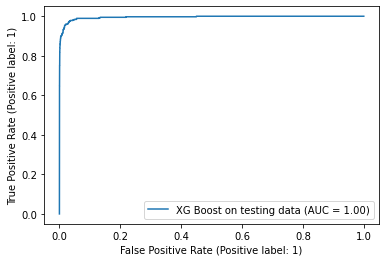

In [70]:
plot_roc_curve(boost_model, X_test, y_test, name = 'XG Boost on testing data')

In [71]:
y_pred_proba = boost_model.predict_proba(X_test)[::,1]
auc = roc_auc_score(y_test, y_pred_proba)
print("Auc score for testing data is", auc)

/home/hp/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Auc score for testing data is 0.9952233813333333


#### Let us now predict for training data

In [72]:
y_pred = boost_model.predict(X_train)
mse = MSE(y_train, y_pred)
print("Mean square Error for Testing data : ", mse)

Mean square Error for Testing data :  5e-05


/home/hp/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


Confusion matrix and ROC Curve for training data

In [73]:
cm = confusion_matrix(y_train, y_pred)
cm

array([[59000,     0],
       [    3,   997]])

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/home/hp/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


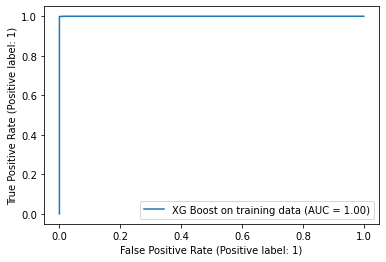

In [74]:
plot_roc_curve(boost_model, X_train, y_train, name = 'XG Boost on training data')

In [75]:
y_pred_proba = boost_model.predict_proba(X_train)[::,1]
auc = roc_auc_score(y_train, y_pred_proba)
print("Auc score for training data is", auc)

Auc score for training data is 0.999987220338983


/home/hp/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


### 1.f SMOTE and XGB.

In [76]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', XGBR(random_state=11,silent=True)]])

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)
    
param_grid = {'classifier__reg_alpha':[0.01, 0.05, 0.1, 0.2, 0.5, 0.75, 1.2,1.4,1.6,1.8, 1, 2, 3]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

/home/hp/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/hp/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/hp/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning:

[18:45:29] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:45:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Cross-validation score: 0.9936333333333334
Test score: 0.99275


In [77]:
print(f'Cross-validation score: {cv_score}\nTest score: {test_score}')

Cross-validation score: 0.9936333333333334
Test score: 0.99275


In [78]:
grid_search.best_params_

{'classifier__reg_alpha': 0.05}

Let us analyze for testing data

In [79]:
test_score = grid_search.score(X_test, y_test)

In [80]:
y_pred = grid_search.best_estimator_.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[15578,    47],
       [   69,   306]])

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


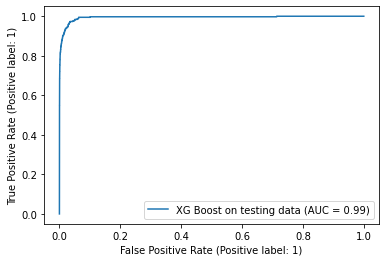

In [81]:
plot_roc_curve(grid_search,X_test, y_test, name = 'XG Boost on testing data')

In [82]:
y_pred_proba = grid_search.predict_proba(X_test)[::,1]
auc = roc_auc_score(y_test, y_pred_proba)
print("Auc score for testing data is", auc)

Auc score for testing data is 0.9941029546666666


In [83]:
y_pred = grid_search.predict(X_train)
mse = MSE(y_train, y_pred)
print("Mean square Error for Testing data : ", mse)

Mean square Error for Testing data :  1.6666666666666667e-05


Let us analyze for training data

In [84]:
test_score = grid_search.score(X_train, y_train)

In [85]:
y_pred = grid_search.best_estimator_.predict(X_train)
confusion_matrix(y_train, y_pred)

array([[59000,     0],
       [    1,   999]])

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


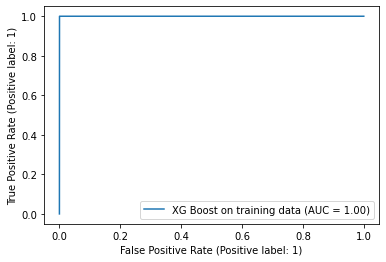

In [86]:
plot_roc_curve(grid_search, X_train, y_train, name = 'XG Boost on training data')

In [87]:
y_pred_proba = grid_search.predict_proba(X_train)[::,1]
auc = roc_auc_score(y_train, y_pred_proba)
print("Auc score for training data is", auc)

Auc score for training data is 0.9999996949152543
[18:16:30] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[18:16:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:19:52] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find an

#### ISLR 6.6.3

a
(iv) Steadily decreases: As we increase s from 0, all β 's increase from 0 to their least square estimate values. The training error for 0 β s is the maximum and it steadily decreases to the Ordinary Least Square RSS

b
(ii) It decreases initially, and then eventually start increasing in a U shape: When s=0, all β s are 0, the model is extremely simple and has a high test RSS. As we increase s, beta s assumes non-zero values and the model starts fitting well on test data and so test RSS decreases. Eventually, as beta s approach their full blown OLS values, they start overfitting to the training data, thereby increasing test RSS.

c
(iii) Steadily increases: When s=0, the model effectively predicts a constant and has almost no variance. As we increase s, the models includes more β s and their values start increasing. From this point onwards , the values of β s become highly dependent on training data, thus increasing the variance.

d
(iv) Steadily decrease: When s=0, the model effectively predicts a constant and hence the prediction is far from actual value. Thus bias is high. As s increases, more β s become non-zero and thus the model continues to fit training the data better. And therfore the, bias decreases.

e
(v) Remains constant: By definition, the  irreducible error is model independent and hence irrespective of the choice of s, remains constant.


Solution 2
_Part a)_

iv. is TRUE - as s is increased, there is less and less constraint on the model and it should always have a better training error (if s is increased to s', then the best model using a budget of s would be included when using a budget of s')

_Part b)_

ii. is TRUE - test error will improve (decrease) to a point and then will worsen (increase) as constraints loosen up and the model overfits

_Part c)_

iii. is TRUE - the variance always increases with fewer constraints

_Part d)_

iv. is TRUE - bias always decreases with more model flexibility

_Part e)_

v. is TRUE - the irreducible error is a constant value, not related to model selection

### ISLR 6.6.5

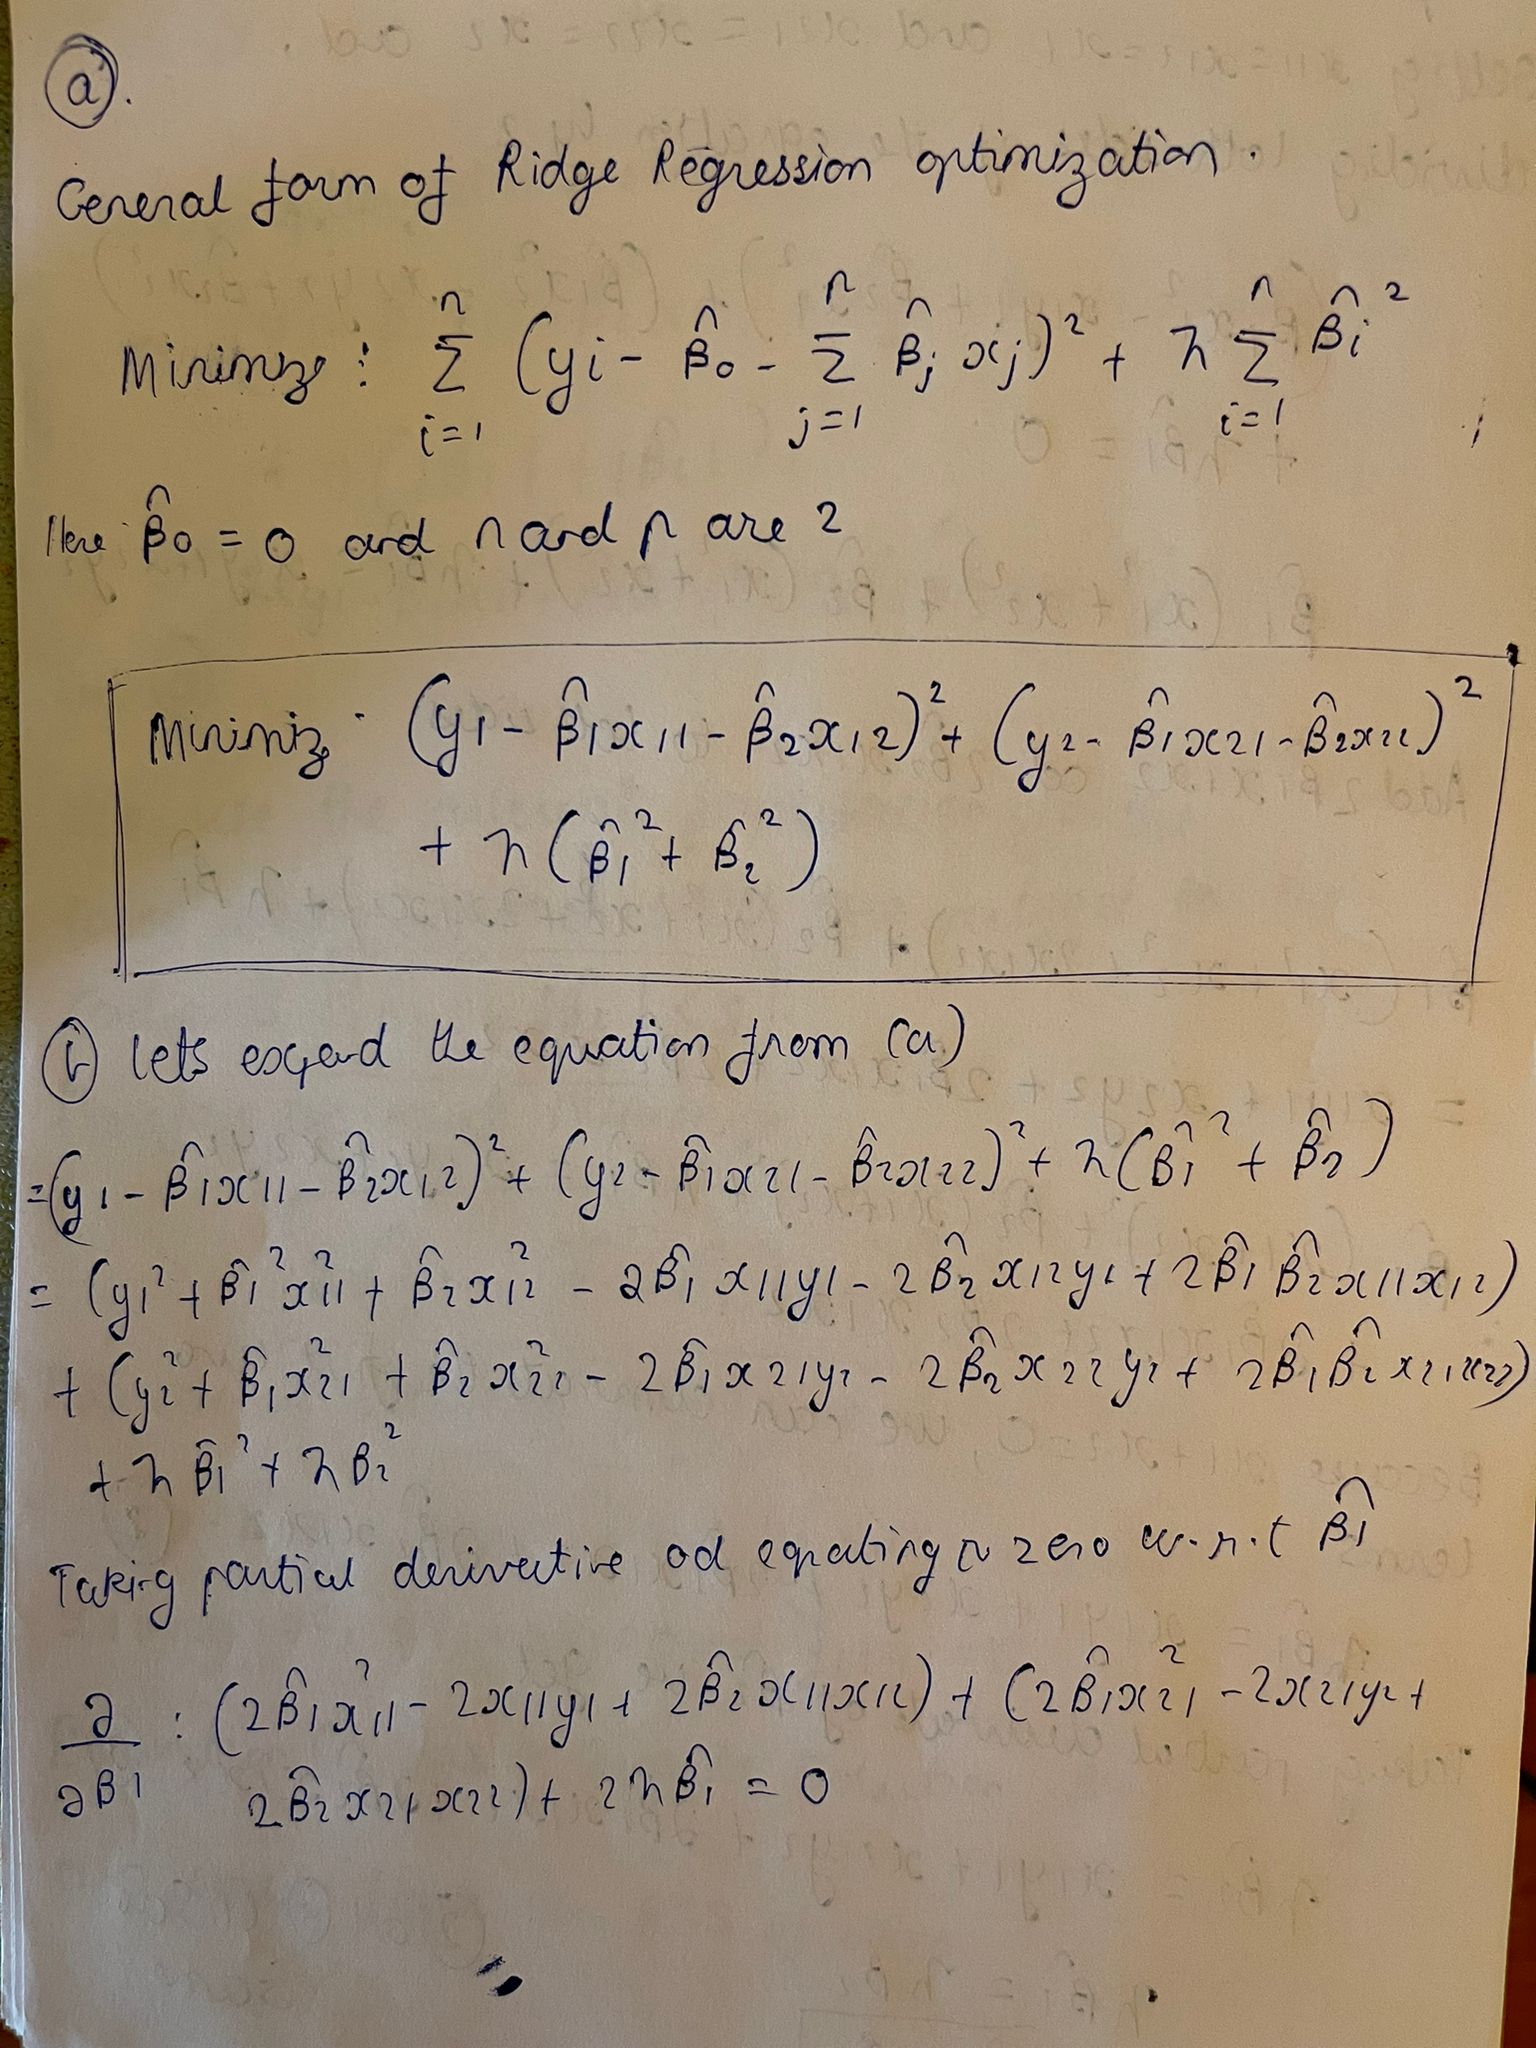

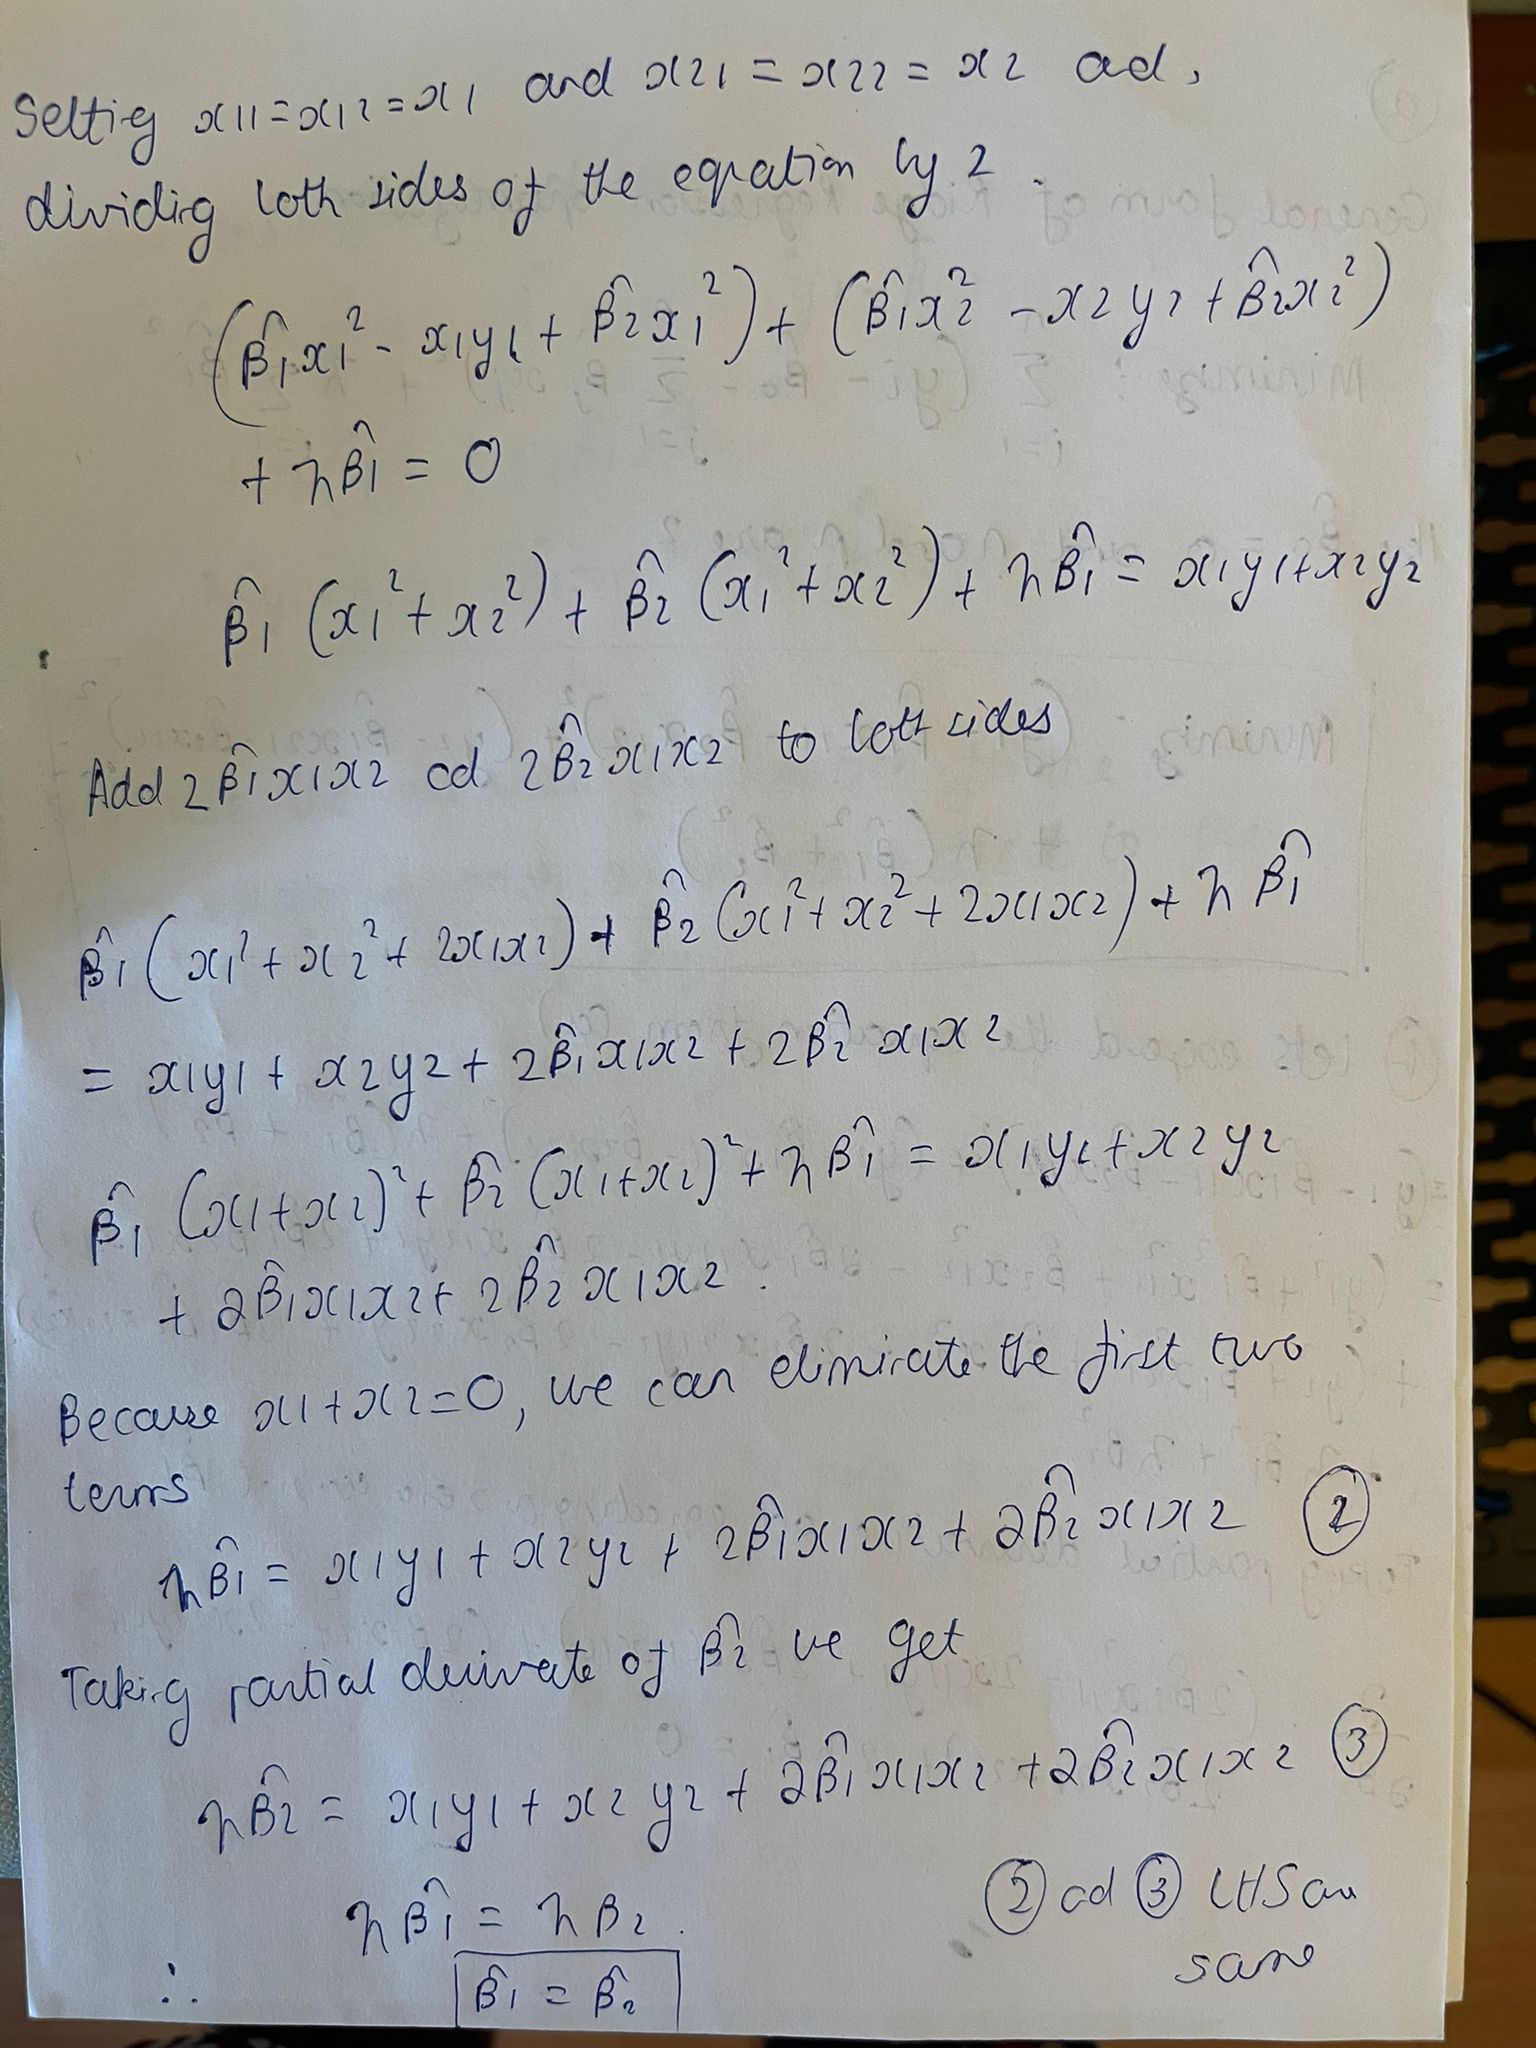

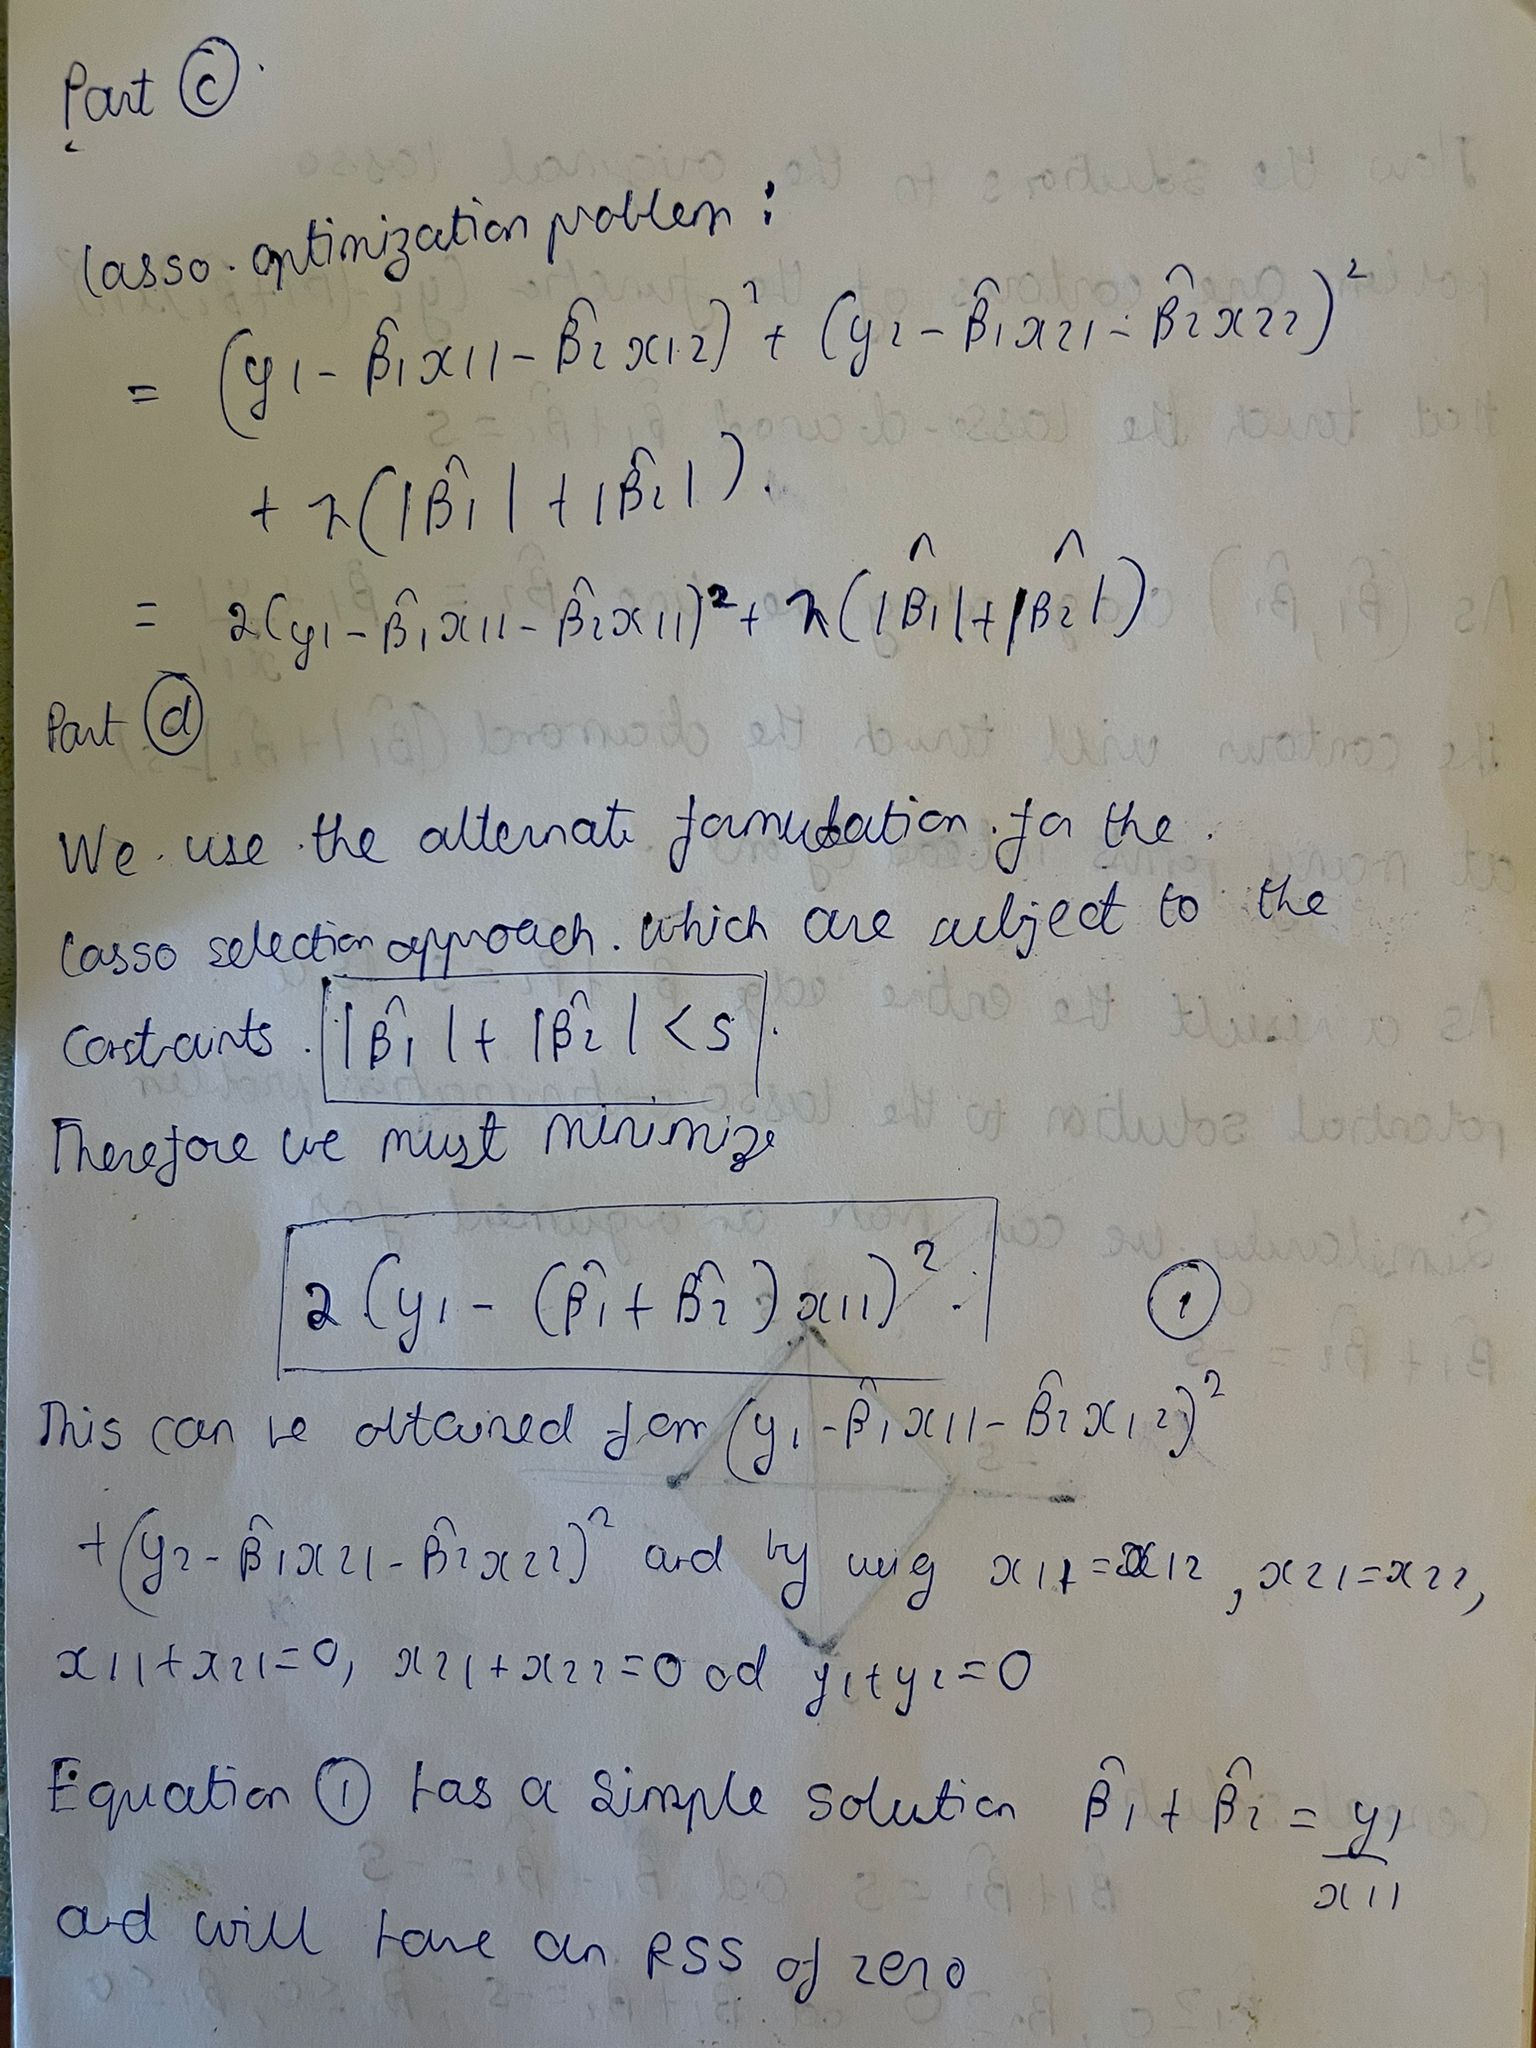

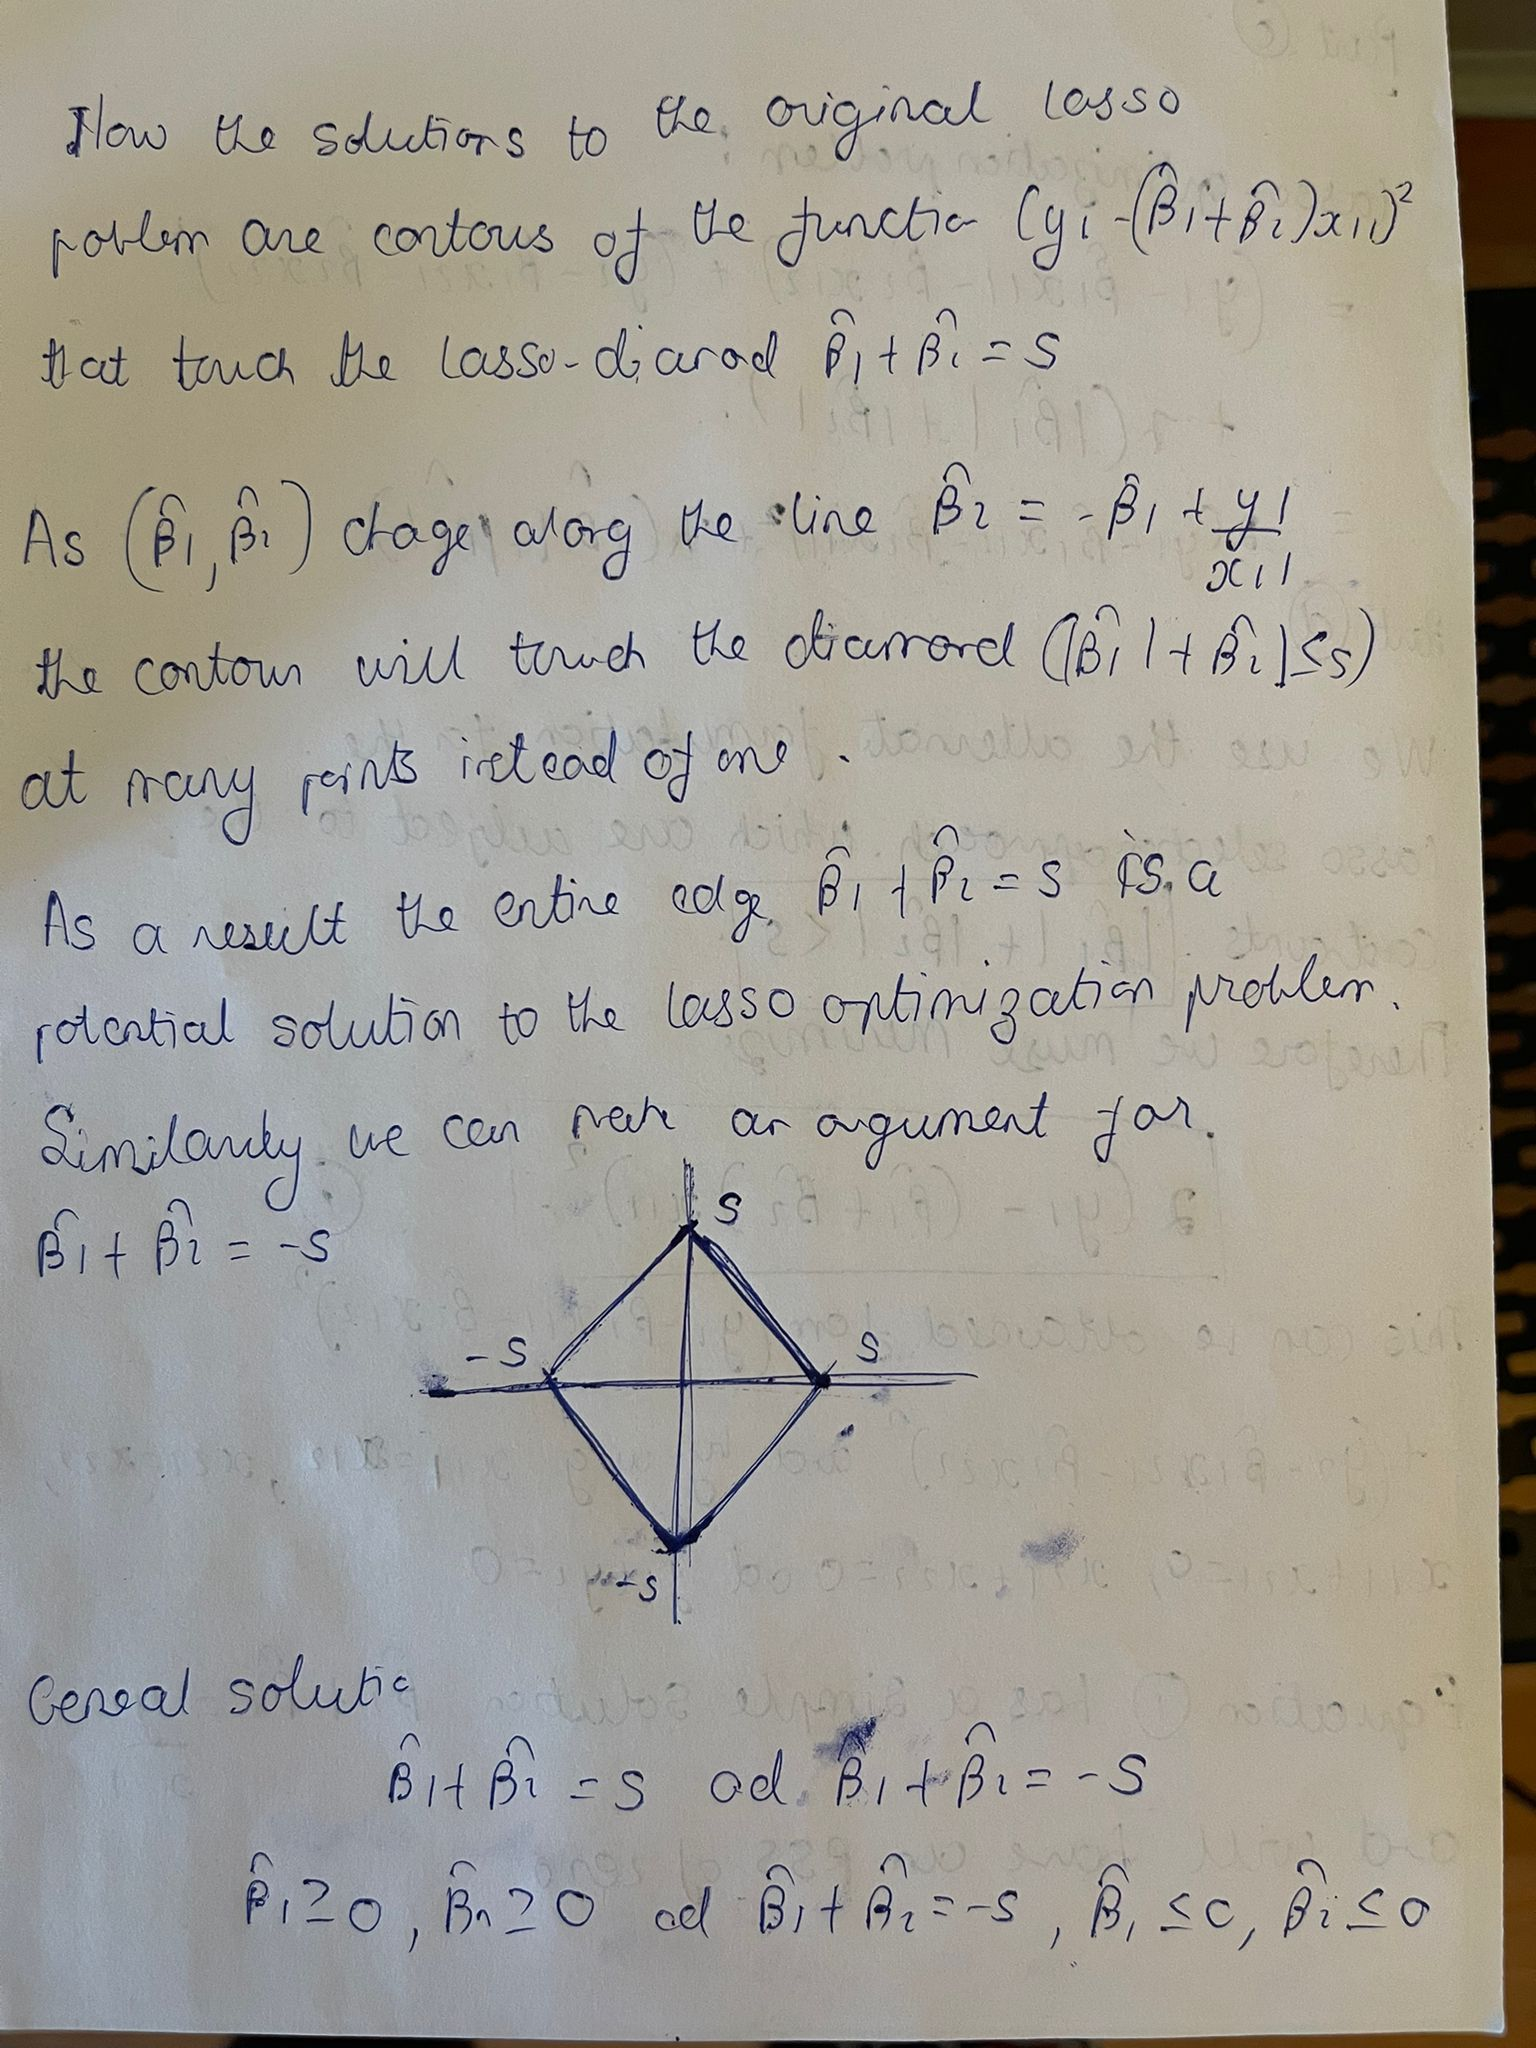

#### ISLR 8.4.5

_Majority voting for classification:
In the majority vote approach we assign the observation to the class that occurs the most. Thus, we count the number of assignments done to each class by making use of a cutoff value. As shown below, the observation X is assigned to the Red class.

The number of red predictions is greater than the number of green predictions based on a 50% threshold, thus RED.

  
  - Count of `P(Class is Red | X) < 0.5 = 4` and `P(Class is Red | X) >= 0.5 = 6`. So `X` is classified as red. 

_Average probability:
As described in the question, when average probability is used the average is taken from the estimated probabilities that result from the bagging model. The average is 0.45, which determines that X does not belong to the Red class.The average of the probabilities is less than the 50% threshold, thus GREEN.

  - Average probability that `P(Class is Red | X)` is `4.5/10 = 0.45`. Therefore, `X` is classified as green.

#### ISLR 9.7.3


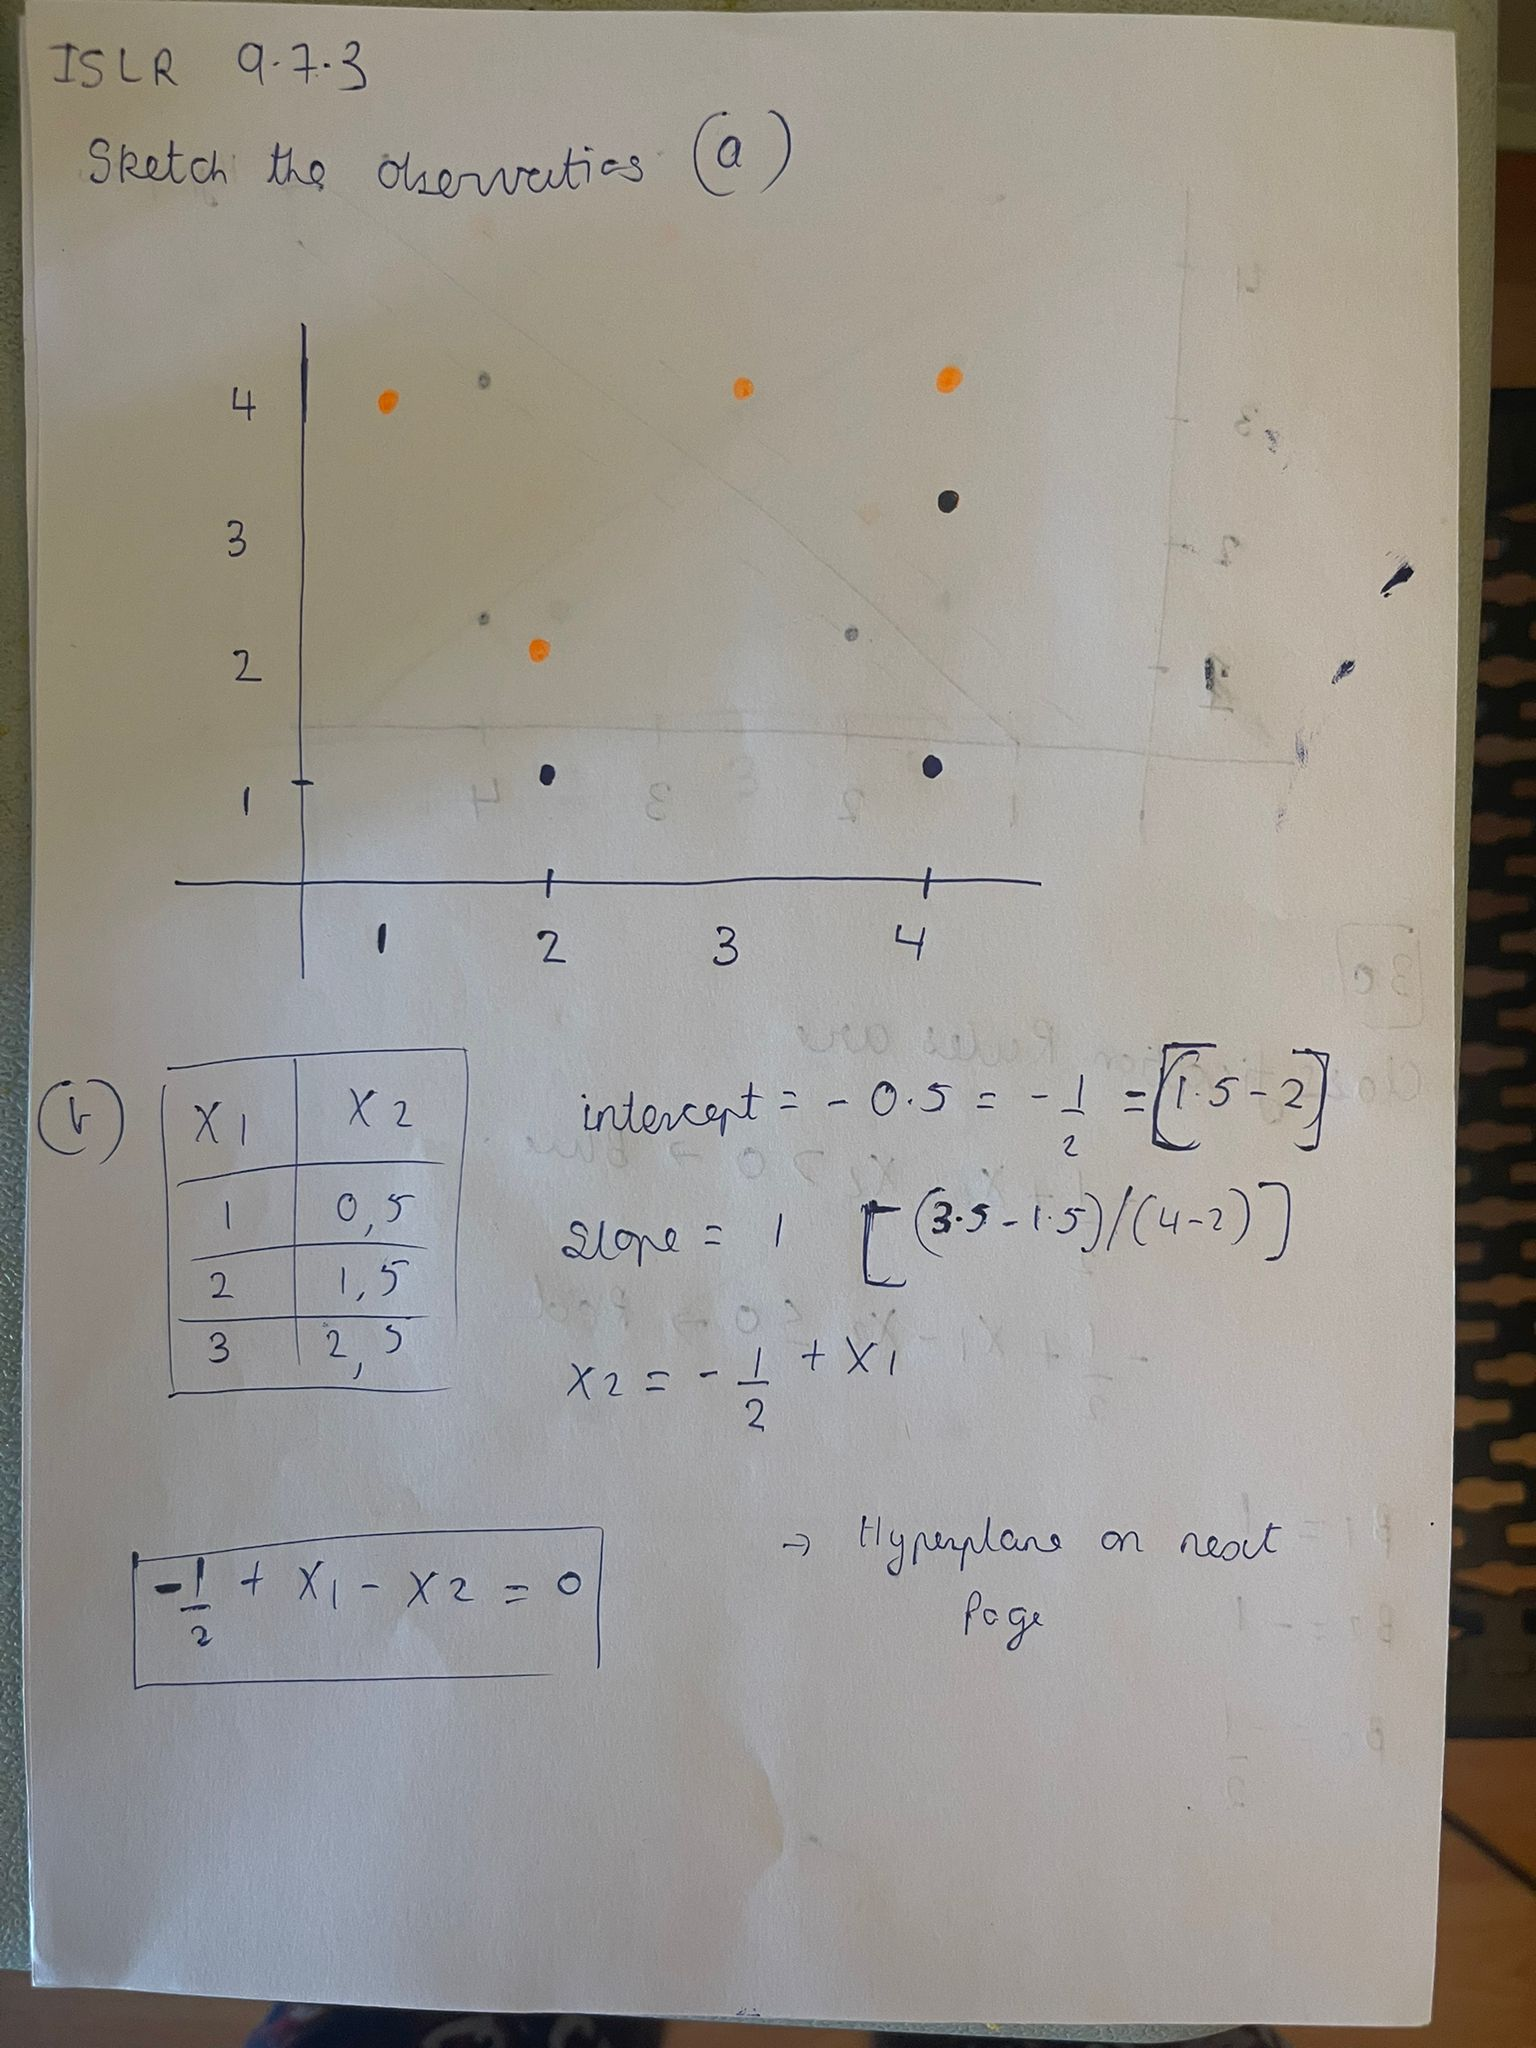

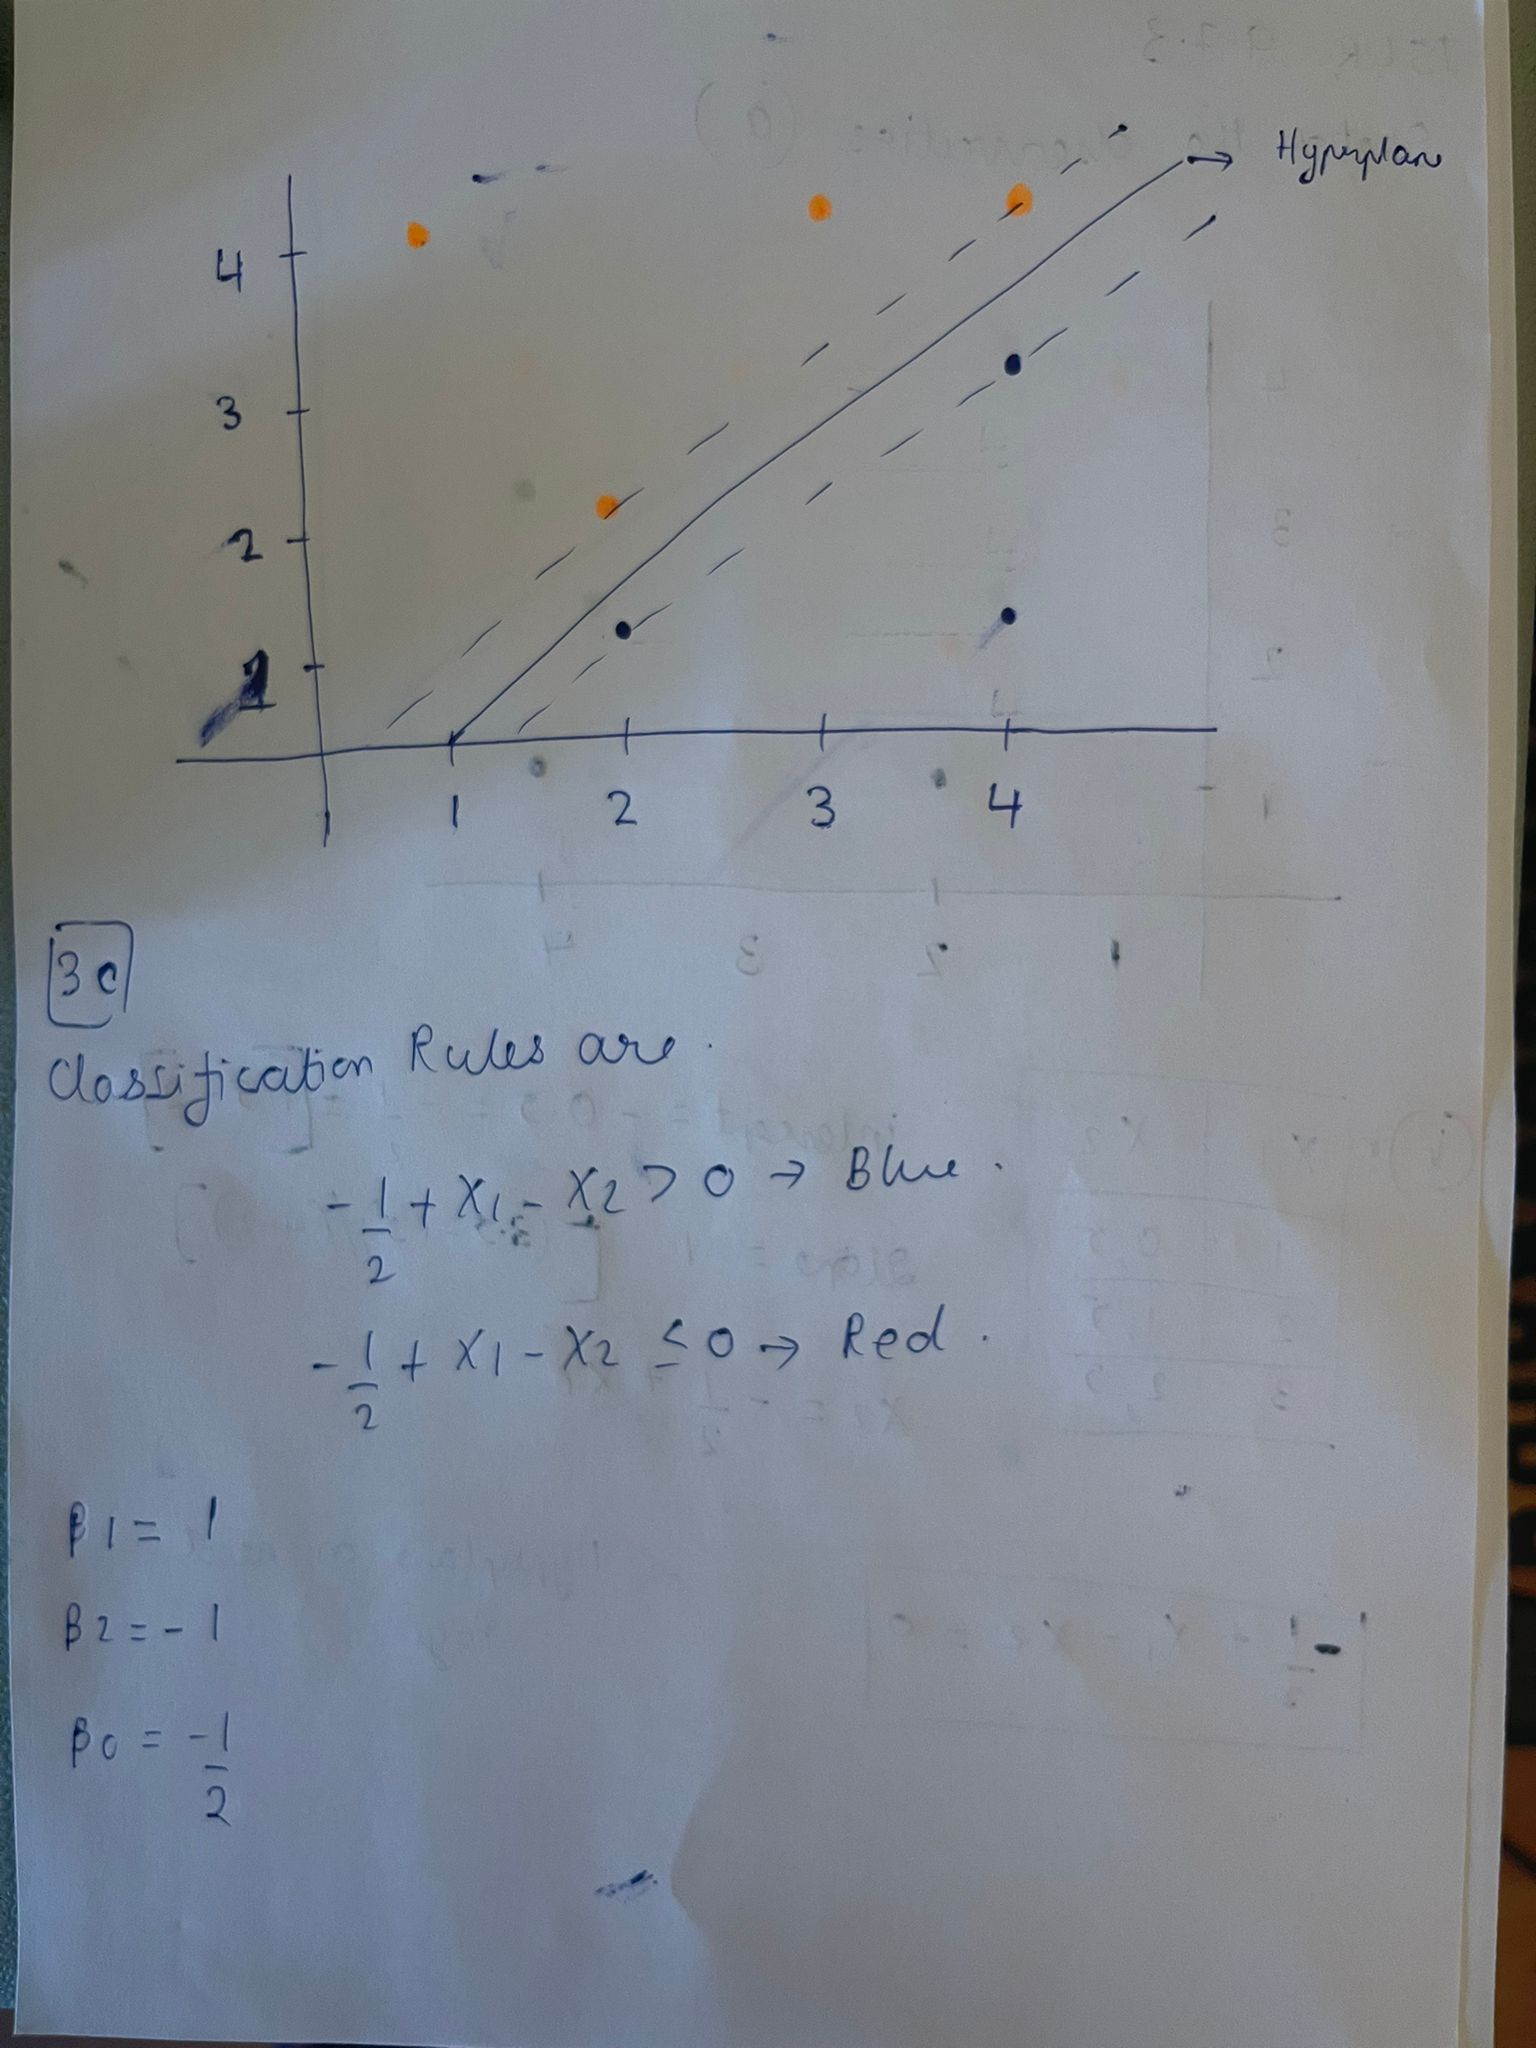

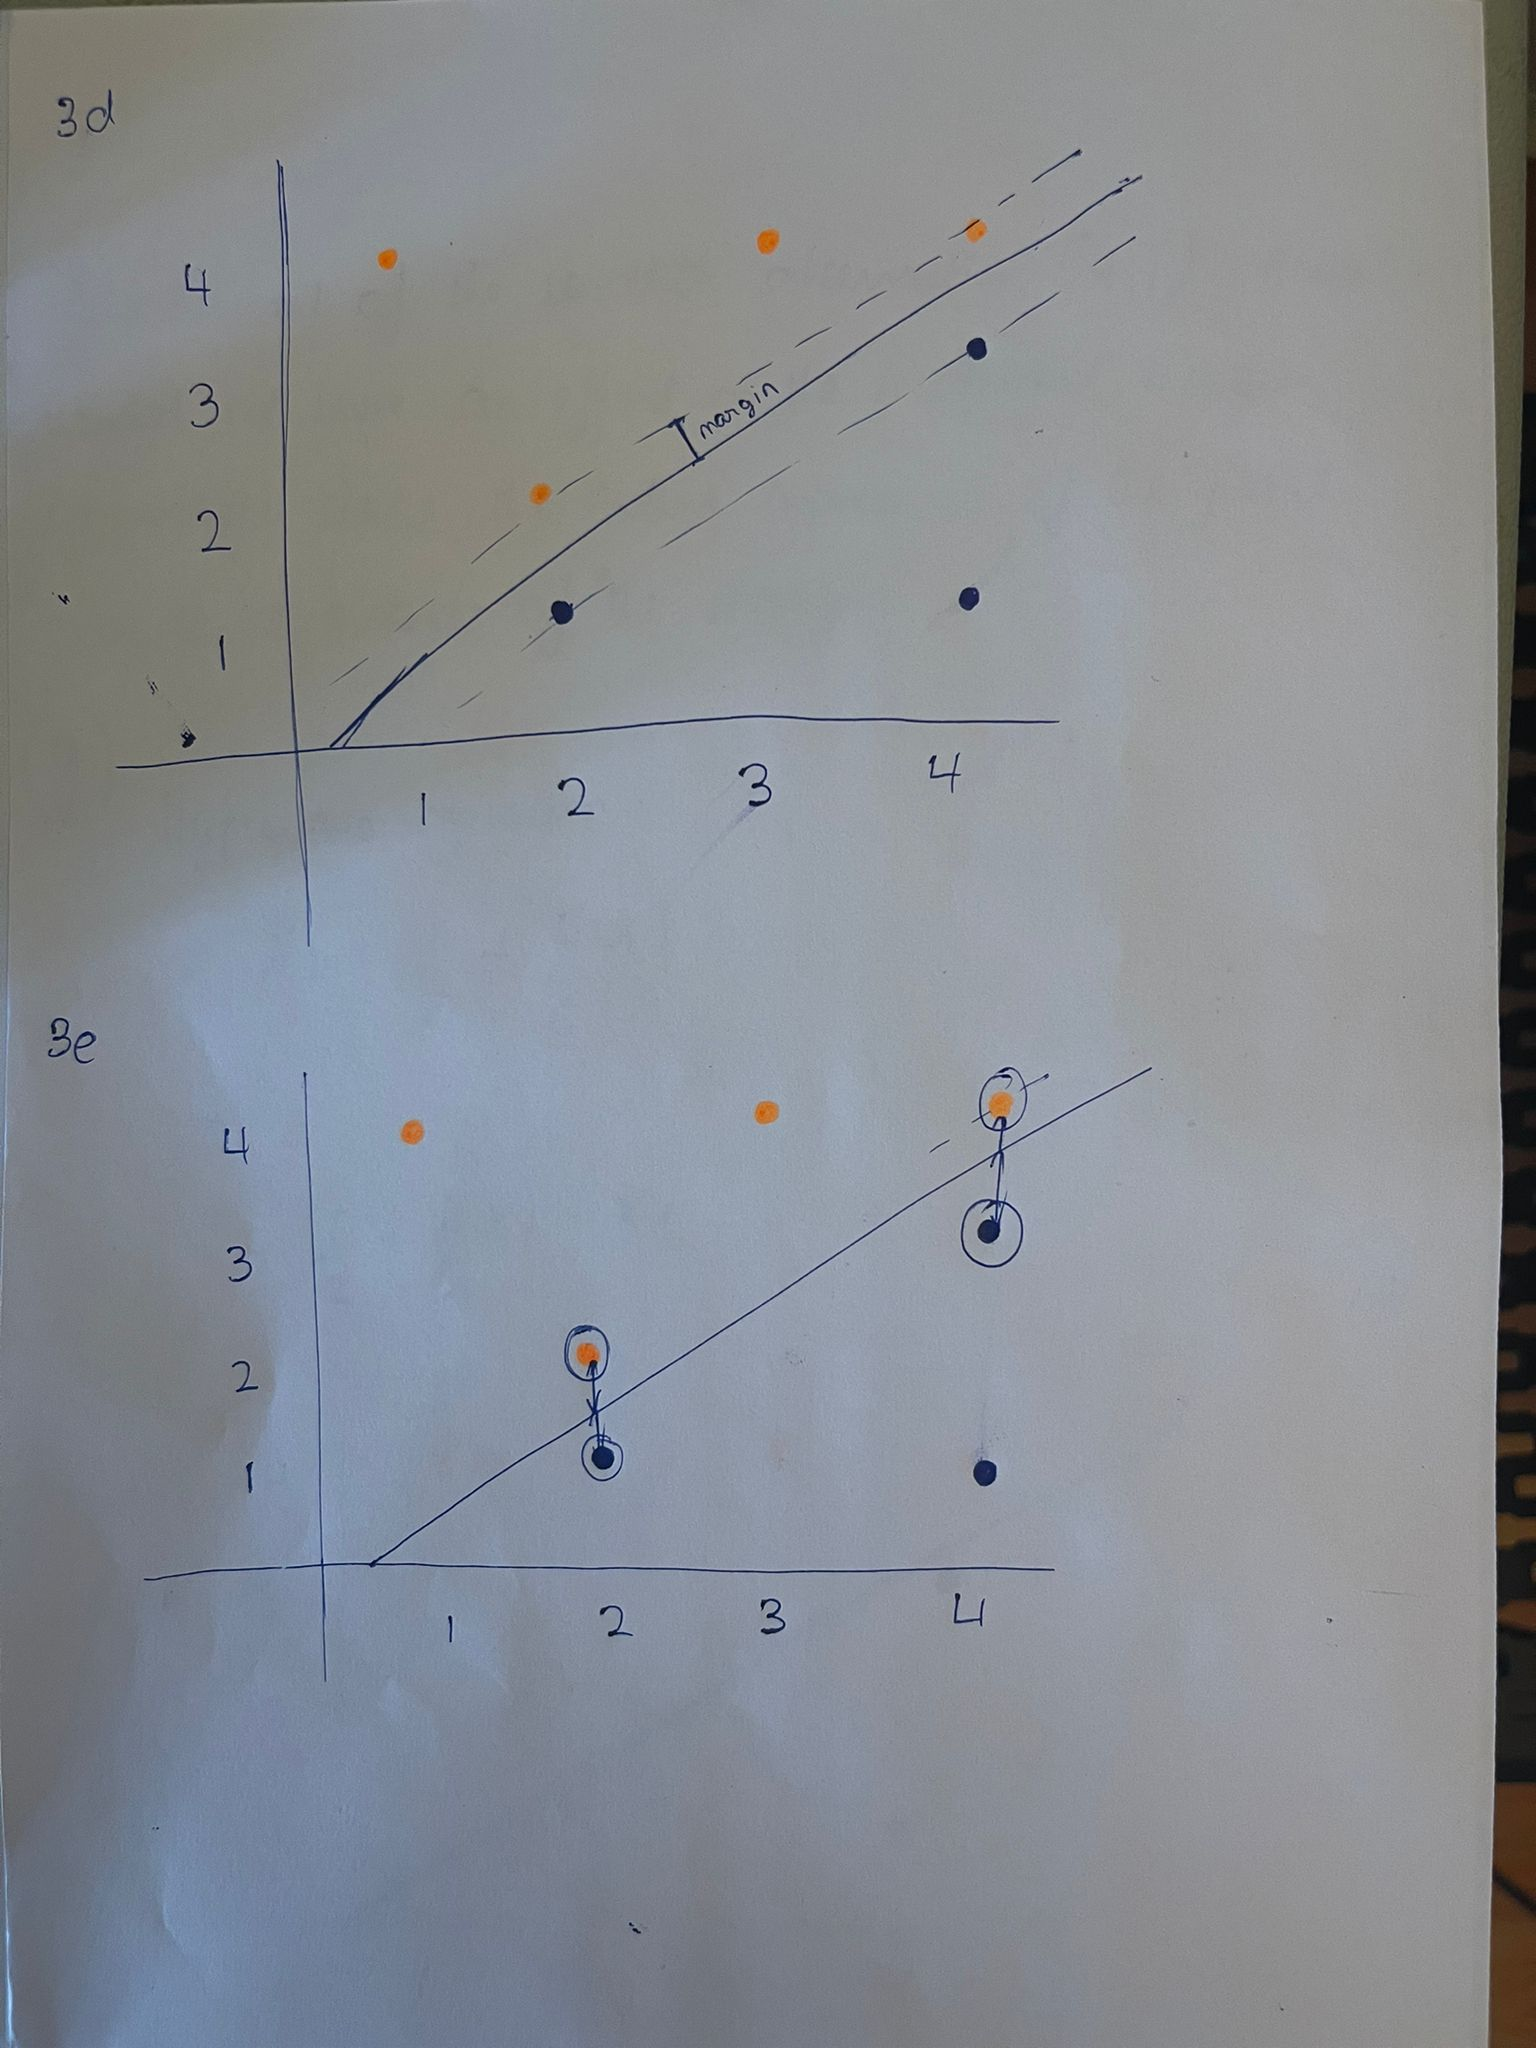

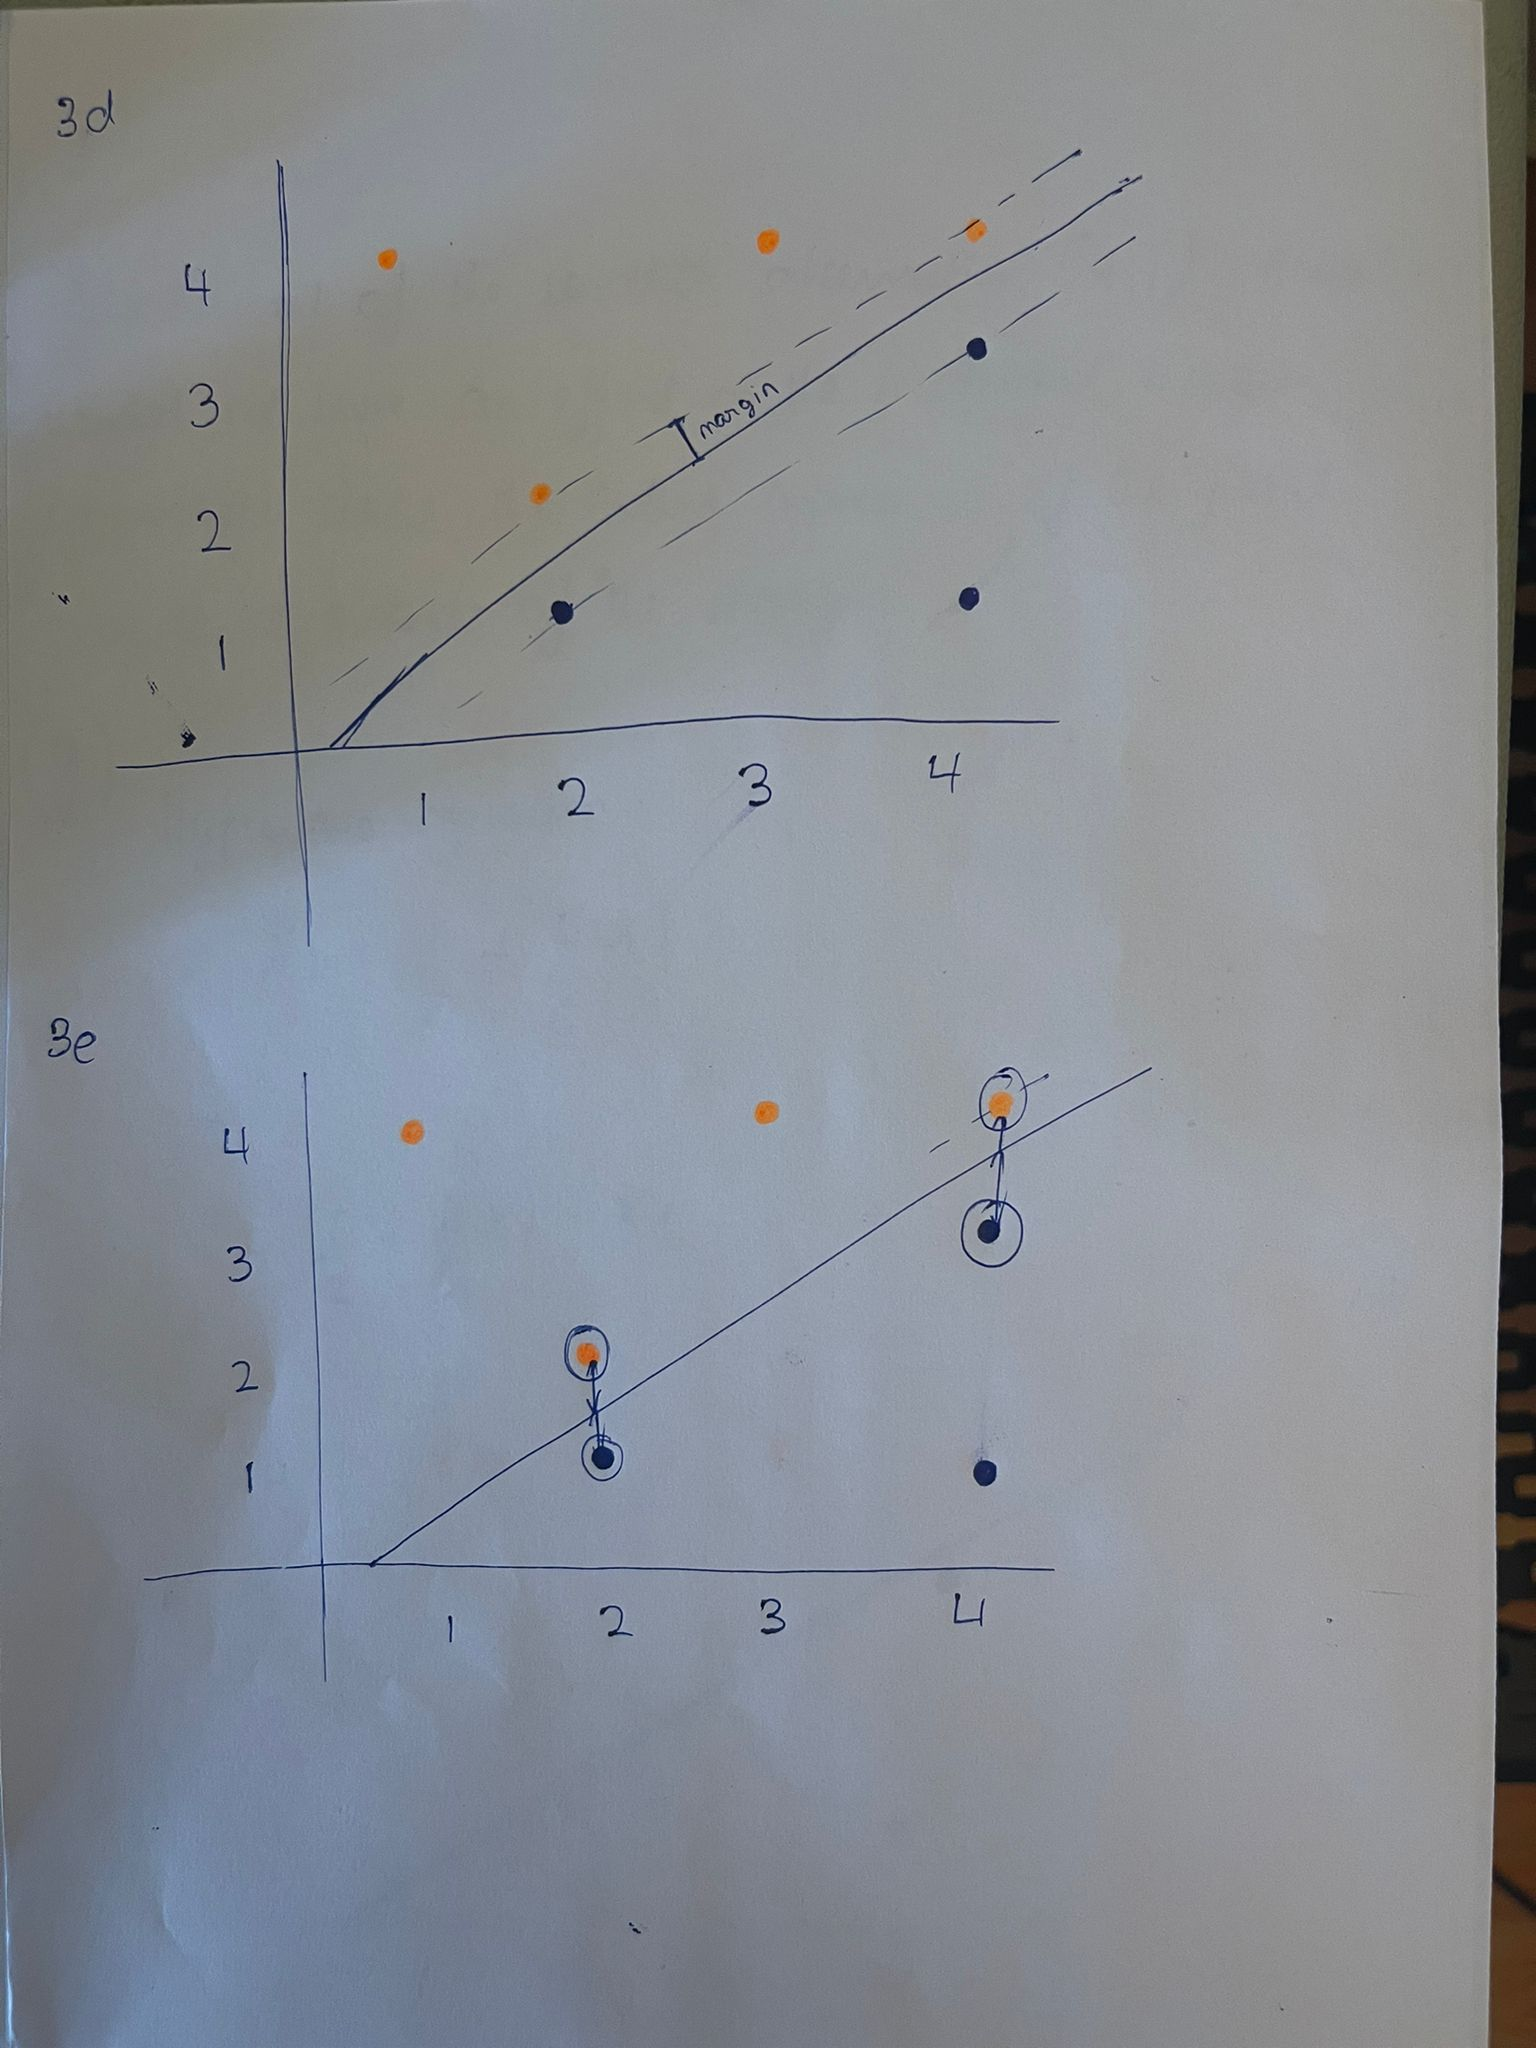

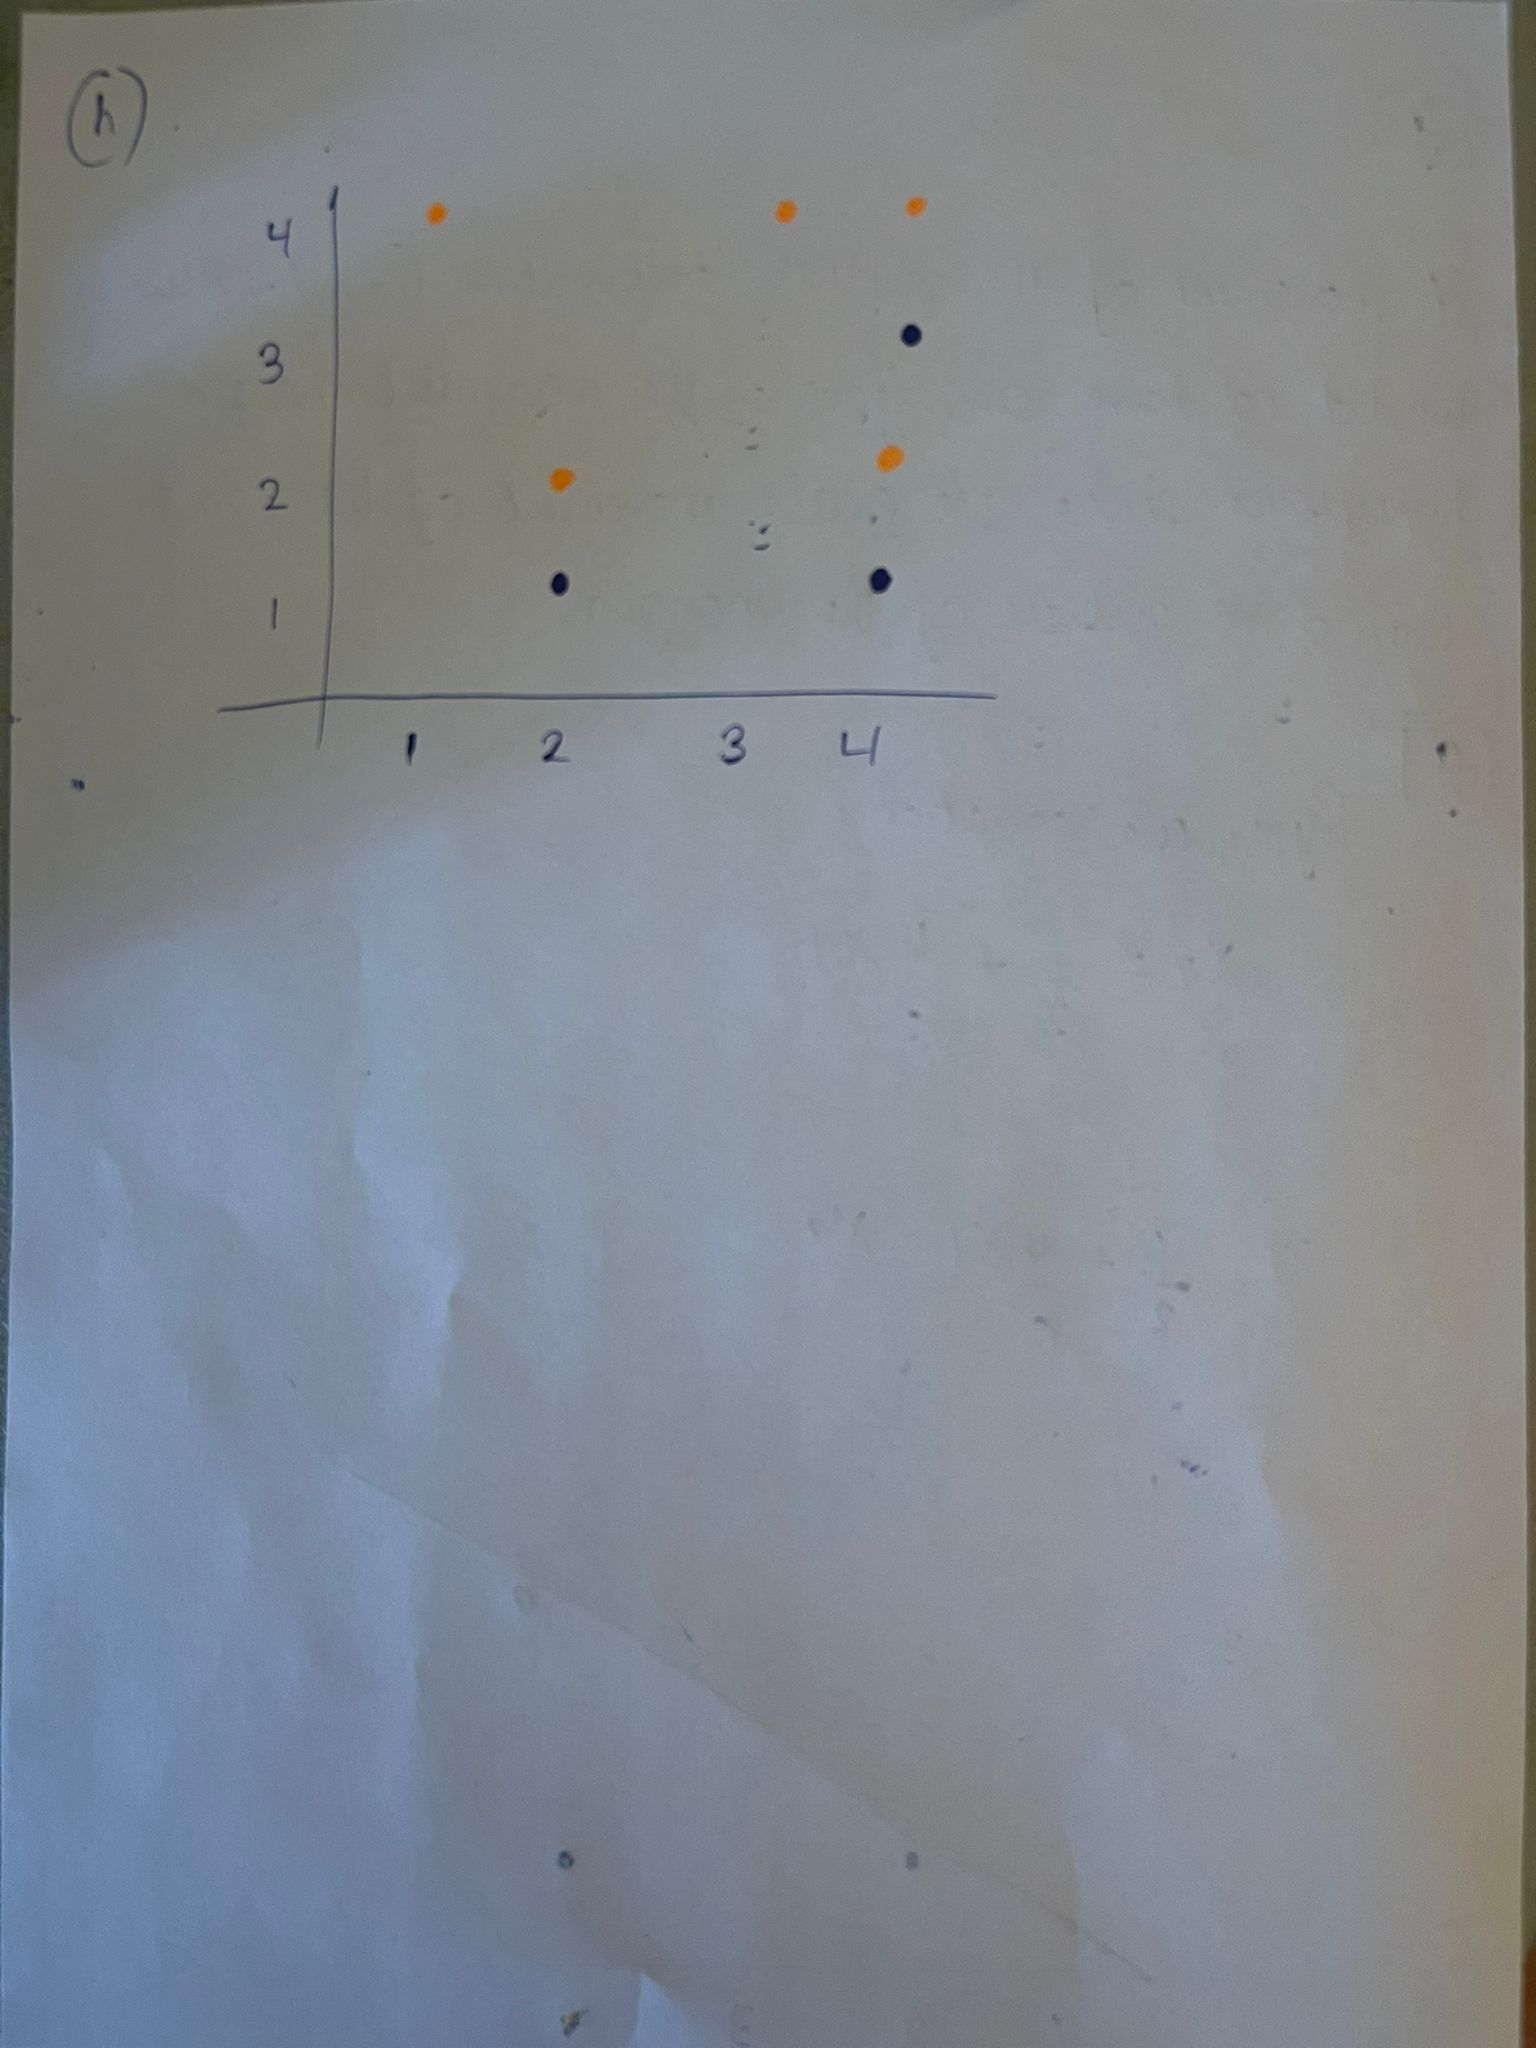